# Линенйная регрессия

# полдучить проданные крвартиры
# построить регресию от параметрв () как бейзлайн (а пока средене)
            "title": "Причальный Юг 3 72.8 Причальный пр., д. 8 55.76018,37.517482",
            "price": "61182068.00",
            "price_sale": "42827447.00",
            "datetime_create": "2023-02-11T00:04:27.136984Z",
            "category": "Новостройки",
            "brand": "level.ru",
            "brand_url": "level.ru",
            "description": "[{\"name\": \"\\u041f\\u0410\\u041e \\u00ab\\u0421\\u043e\\u0432\\u043a\\u043e \"discount_percent\": null, \"discount_sum\": null, \"amount\": \"30000000.00\", \"term\": 360, \"deposit\": 15.0, \"mortgage_percent\": 4.5, \"is_base_price\": null, \"readable_sale_type\": null, \"sale_type\": null, \"sale_type_name\": null}]",
            "source_url": "https://level.ru/api/flat/?limit=8&offset=1096",

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sqlite3
import json

# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [3]:
#connection = sqlite3.connect('/tmp/sql_dump/db.sqlite3')
connection = sqlite3.connect('/home/jupyter-amtsu/project/price_alert/db.sqlite3')
cursor = connection.cursor()

In [4]:
df2 = pd.DataFrame([['Earth', 1], ['Moon', 0.606], ['Mars', 0.107]])

In [5]:

df2

0      1
0  Earth  1.000
1   Moon  0.606
2   Mars  0.107

In [5]:
#5196982
#5193646
cursor.execute("""
select 
count(1)
from products_history 
limit 100
""")
cursor.fetchall()


[(13060051,)]

In [6]:
#66039
#2211
#1104
#3297
#3336
cursor.execute("""
select 
count(1)
from products_history 
where source_url like "%level.ru%"
 and datetime_create > "2023-02-11"
limit 1000
""")
cursor.fetchall()


[(119559,)]

In [7]:

cursor.execute("""
select 
count(*)
from products_history 
where (
    source_url like "%fr.mos.ru%"
    --or 
    --source_url like "%level.ru%"
 )
 and datetime_create > "2023-02-11"
 order by id desc
limit 300
""")
cursor.fetchall()
#3028
#3343

[(9227,)]

In [3]:

cursor.execute("""
select 
*
from products_history 
where (
    source_url like "%fr.mos.ru%"
    --or 
    --source_url like "%level.ru%"
 )
 and datetime_create > "2023-02-11"
 order by id desc
limit 30
""")
cursor.fetchall()

[(12984597,
  '2023-05-18 17:22:48.756128',
  'object: Вилиса Лациса ул., д. 38, к. 1, 2, district: 2504, county: 2450, flats: 472',
  None,
  13922990,
  None,
  'кв. 248, корп. 2_Вилиса Лациса ул., д. 38, к. 2 vilisa-latsisa-ul-d-38-k-1-2 17 56.3 Вилиса Лациса ул., д. 38, к. 1, 2',
  None,
  13922990,
  1,
  'fr.mos.ru',
  'fr.mos.ru',
  None,
  'Реновация',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  'https://fr.mos.ru/upload/iblock/b1e/ajxtd0g3pg8c9dpz5mas1yznyxbd5q10.png',
  None,
  None,
  None,
  None,
  'https://fr.mos.ru/pokupka-nedvizhimosti-dlya-vseh/ajax.php?type[]=R&status[]=FINISHED&status[]=PROCESSING&price_min=0&price_max=35000000&floor_min=-1&floor_max=54&open_sale=1&pagesize=100000',
  'https://investmoscow.ru/tenders/tender/19065693',
  None,
  'Вилиса Лациса ул., д. 38, к. 1, 2',
  56.3,
  None,
  None,
  2021,
  17,
  17,
  55.8569,
  247300,
  2,
  37.4051),
 (12984596,
  '2023-05-18 17:22:48.747203',
 

In [4]:
#cursor.execute("""
#delete
#from products_history 
#where source_url like "%level.ru%"
# and datetime_create > "2023-02-11"
#""")
#cursor.fetchall()


In [5]:
#connection.commit()

In [6]:
# для поситроения график апризодится ограничвать количетсво точек 1200
cursor.execute("""
select 
    title,
    price,
    price_sale,
    datetime_create,
    category,
    --brand,
    --brand_url,
    --description,
    source_url,
    apartment_area,
    apartment_completion_quarter,
    apartment_completion_year,
    apartment_floor,
    apartment_floors_total,
    apartment_ceilingheight,
    apartment_room,
    apartment_ppm,
    apartment_address,
    apartment_location_lat,
    apartment_location_lon
    
from products_history 
where url like "%level.ru%"
   and price_sale < 100000000
order by datetime_create desc
limit 1200
""")
#cursor.fetchall()

df = pd.DataFrame(cursor.fetchall(), columns=[
    "title",
    "price",
    "price_sale",
    "datetime_create",
    "category",
    "source_url",
    "apartment_area",
    "apartment_completion_quarter",
    "apartment_completion_year",
    "apartment_floor",
    "apartment_floors_total",
    "apartment_ceilingheight",
    "apartment_room",
    "apartment_ppm",
    "apartment_address",
    "apartment_location_lat",
    "apartment_location_lon",
])


In [7]:
#title, datetime_create, category, source_url, apartment_address

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1200 non-null   object 
 1   price                         1200 non-null   int64  
 2   price_sale                    1200 non-null   int64  
 3   datetime_create               1200 non-null   object 
 4   category                      1200 non-null   object 
 5   source_url                    1200 non-null   object 
 6   apartment_area                1200 non-null   float64
 7   apartment_completion_quarter  1200 non-null   int64  
 8   apartment_completion_year     1200 non-null   int64  
 9   apartment_floor               1200 non-null   int64  
 10  apartment_floors_total        1129 non-null   float64
 11  apartment_ceilingheight       995 non-null    float64
 12  apartment_room                1200 non-null   int64  
 13  apa

In [9]:
df.describe()

price    price_sale  apartment_area   
count  1.200000e+03  1.200000e+03      1200.00000  \
mean   2.861541e+07  2.262799e+07        54.09350   
std    1.340387e+07  1.110871e+07        24.51539   
min    8.288650e+06  6.216487e+06        15.70000   
25%    1.974698e+07  1.538207e+07        35.00000   
50%    2.568417e+07  1.961927e+07        49.25000   
75%    3.508801e+07  2.827707e+07        70.20000   
max    1.190660e+08  9.043137e+07       149.20000   

       apartment_completion_quarter  apartment_completion_year   
count                   1200.000000                1200.000000  \
mean                       2.605833                2024.502500   
std                        0.848174                   1.038055   
min                        1.000000                2022.000000   
25%                        2.000000                2024.000000   
50%                        3.000000                2024.000000   
75%                        3.000000                2025.000000   
max                        4.000000                2026.000000   

       apartment_floor  apartment_floors_total  apartment_ceilingheight   
count      1200.000000             1129.000000               995.000000  \
mean         16.730000               30.238264                 2.968181   
std          10.762991               11.913210                 0.173109   
min           1.000000                4.000000                 2.800000   
25%           8.000000               24.000000                 2.870000   
50%          15.000000               28.000000                 3.000000   
75%          24.000000               32.000000                 3.000000   
max          55.000000               69.000000                 6.430000   

       apartment_room  apartment_ppm  apartment_location_lat   
count     1200.000000   1.200000e+03             1200.000000  \
mean         1.990000   4.280888e+05               55.732795   
std          1.159463   1.008228e+05                0.053477   
min          0.000000   2.186360e+05               55.682432   
25%          1.000000   3.651022e+05               55.687726   
50%          2.000000   4.228640e+05               55.705727   
75%          3.000000   4.769642e+05               55.760180   
max          4.000000   1.380632e+06               55.859526   

       apartment_location_lon  
count             1200.000000  
mean                37.574012  
std                  0.089208  
min                 37.411886  
25%                 37.517482  
50%                 37.572378  
75%                 37.637749  
max                 37.696445

In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 1199
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         995 non-null    object 
 1   price                         995 non-null    int64  
 2   price_sale                    995 non-null    int64  
 3   datetime_create               995 non-null    object 
 4   category                      995 non-null    object 
 5   source_url                    995 non-null    object 
 6   apartment_area                995 non-null    float64
 7   apartment_completion_quarter  995 non-null    int64  
 8   apartment_completion_year     995 non-null    int64  
 9   apartment_floor               995 non-null    int64  
 10  apartment_floors_total        995 non-null    float64
 11  apartment_ceilingheight       995 non-null    float64
 12  apartment_room                995 non-null    int64  
 13  apartment

In [12]:
#df

In [13]:
#for d in df[6]:
#    #print(d)
#    print("--------")
#    #d.encode('cp1251')
#    #print(d.encode('cp1251'))
#    print("--------")
#    #print(d.encode().decode('cp1251'))
#    j = json.loads(d)
#    print(j)

Text(0, 0.5, 'price_sale')

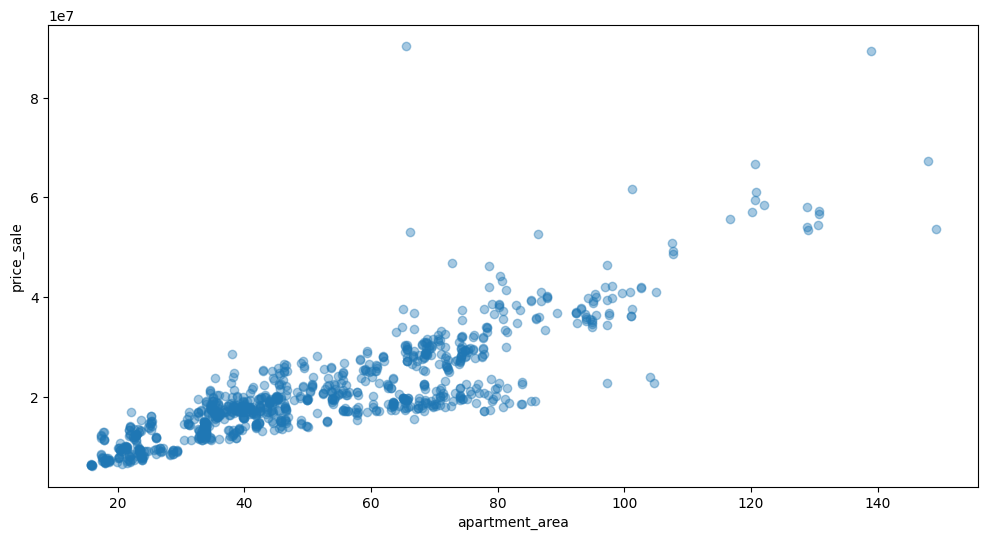

In [14]:
plt.figure(figsize=(12,6))
plt.scatter(df["apartment_area"],df["price_sale"], alpha=0.4)
plt.xlabel("apartment_area")
plt.ylabel("price_sale")
#plt.ylim(10,120)

In [15]:
df.describe()

price    price_sale  apartment_area   
count  9.950000e+02  9.950000e+02      995.000000  \
mean   2.643491e+07  2.054920e+07       51.198191   
std    1.254287e+07  1.003098e+07       23.195909   
min    8.288650e+06  6.216487e+06       15.700000   
25%    1.862116e+07  1.451088e+07       34.000000   
50%    2.420379e+07  1.845367e+07       45.500000   
75%    3.005661e+07  2.486837e+07       68.300000   
max    1.190660e+08  9.043137e+07      149.200000   

       apartment_completion_quarter  apartment_completion_year   
count                    995.000000                 995.000000  \
mean                       2.526633                2024.649246   
std                        0.910504                   1.067438   
min                        1.000000                2022.000000   
25%                        2.000000                2024.000000   
50%                        2.000000                2025.000000   
75%                        3.000000                2025.000000   
max                        4.000000                2026.000000   

       apartment_floor  apartment_floors_total  apartment_ceilingheight   
count       995.000000              995.000000               995.000000  \
mean         17.321608               30.166834                 2.968181   
std          10.805258               12.291247                 0.173109   
min           1.000000                4.000000                 2.800000   
25%           9.000000               24.000000                 2.870000   
50%          16.000000               26.000000                 3.000000   
75%          24.000000               32.000000                 3.000000   
max          55.000000               69.000000                 6.430000   

       apartment_room  apartment_ppm  apartment_location_lat   
count      995.000000   9.950000e+02              995.000000  \
mean         1.929648   4.124593e+05               55.732690   
std          1.177879   9.546625e+04                0.058033   
min          0.000000   2.186360e+05               55.682432   
25%          1.000000   3.519615e+05               55.687726   
50%          2.000000   4.106020e+05               55.705727   
75%          3.000000   4.604475e+05               55.760180   
max          4.000000   1.380632e+06               55.859526   

       apartment_location_lon  
count              995.000000  
mean                37.569525  
std                  0.093869  
min                 37.411886  
25%                 37.471704  
50%                 37.545820  
75%                 37.637749  
max                 37.696445

In [16]:
#import seaborn as sns
##penguins = sns.load_dataset(df)
#sns.pairplot(df)

In [17]:
#plt.show()

In [18]:
# importing packages
import seaborn
import pandas 
import matplotlib.pyplot as plt


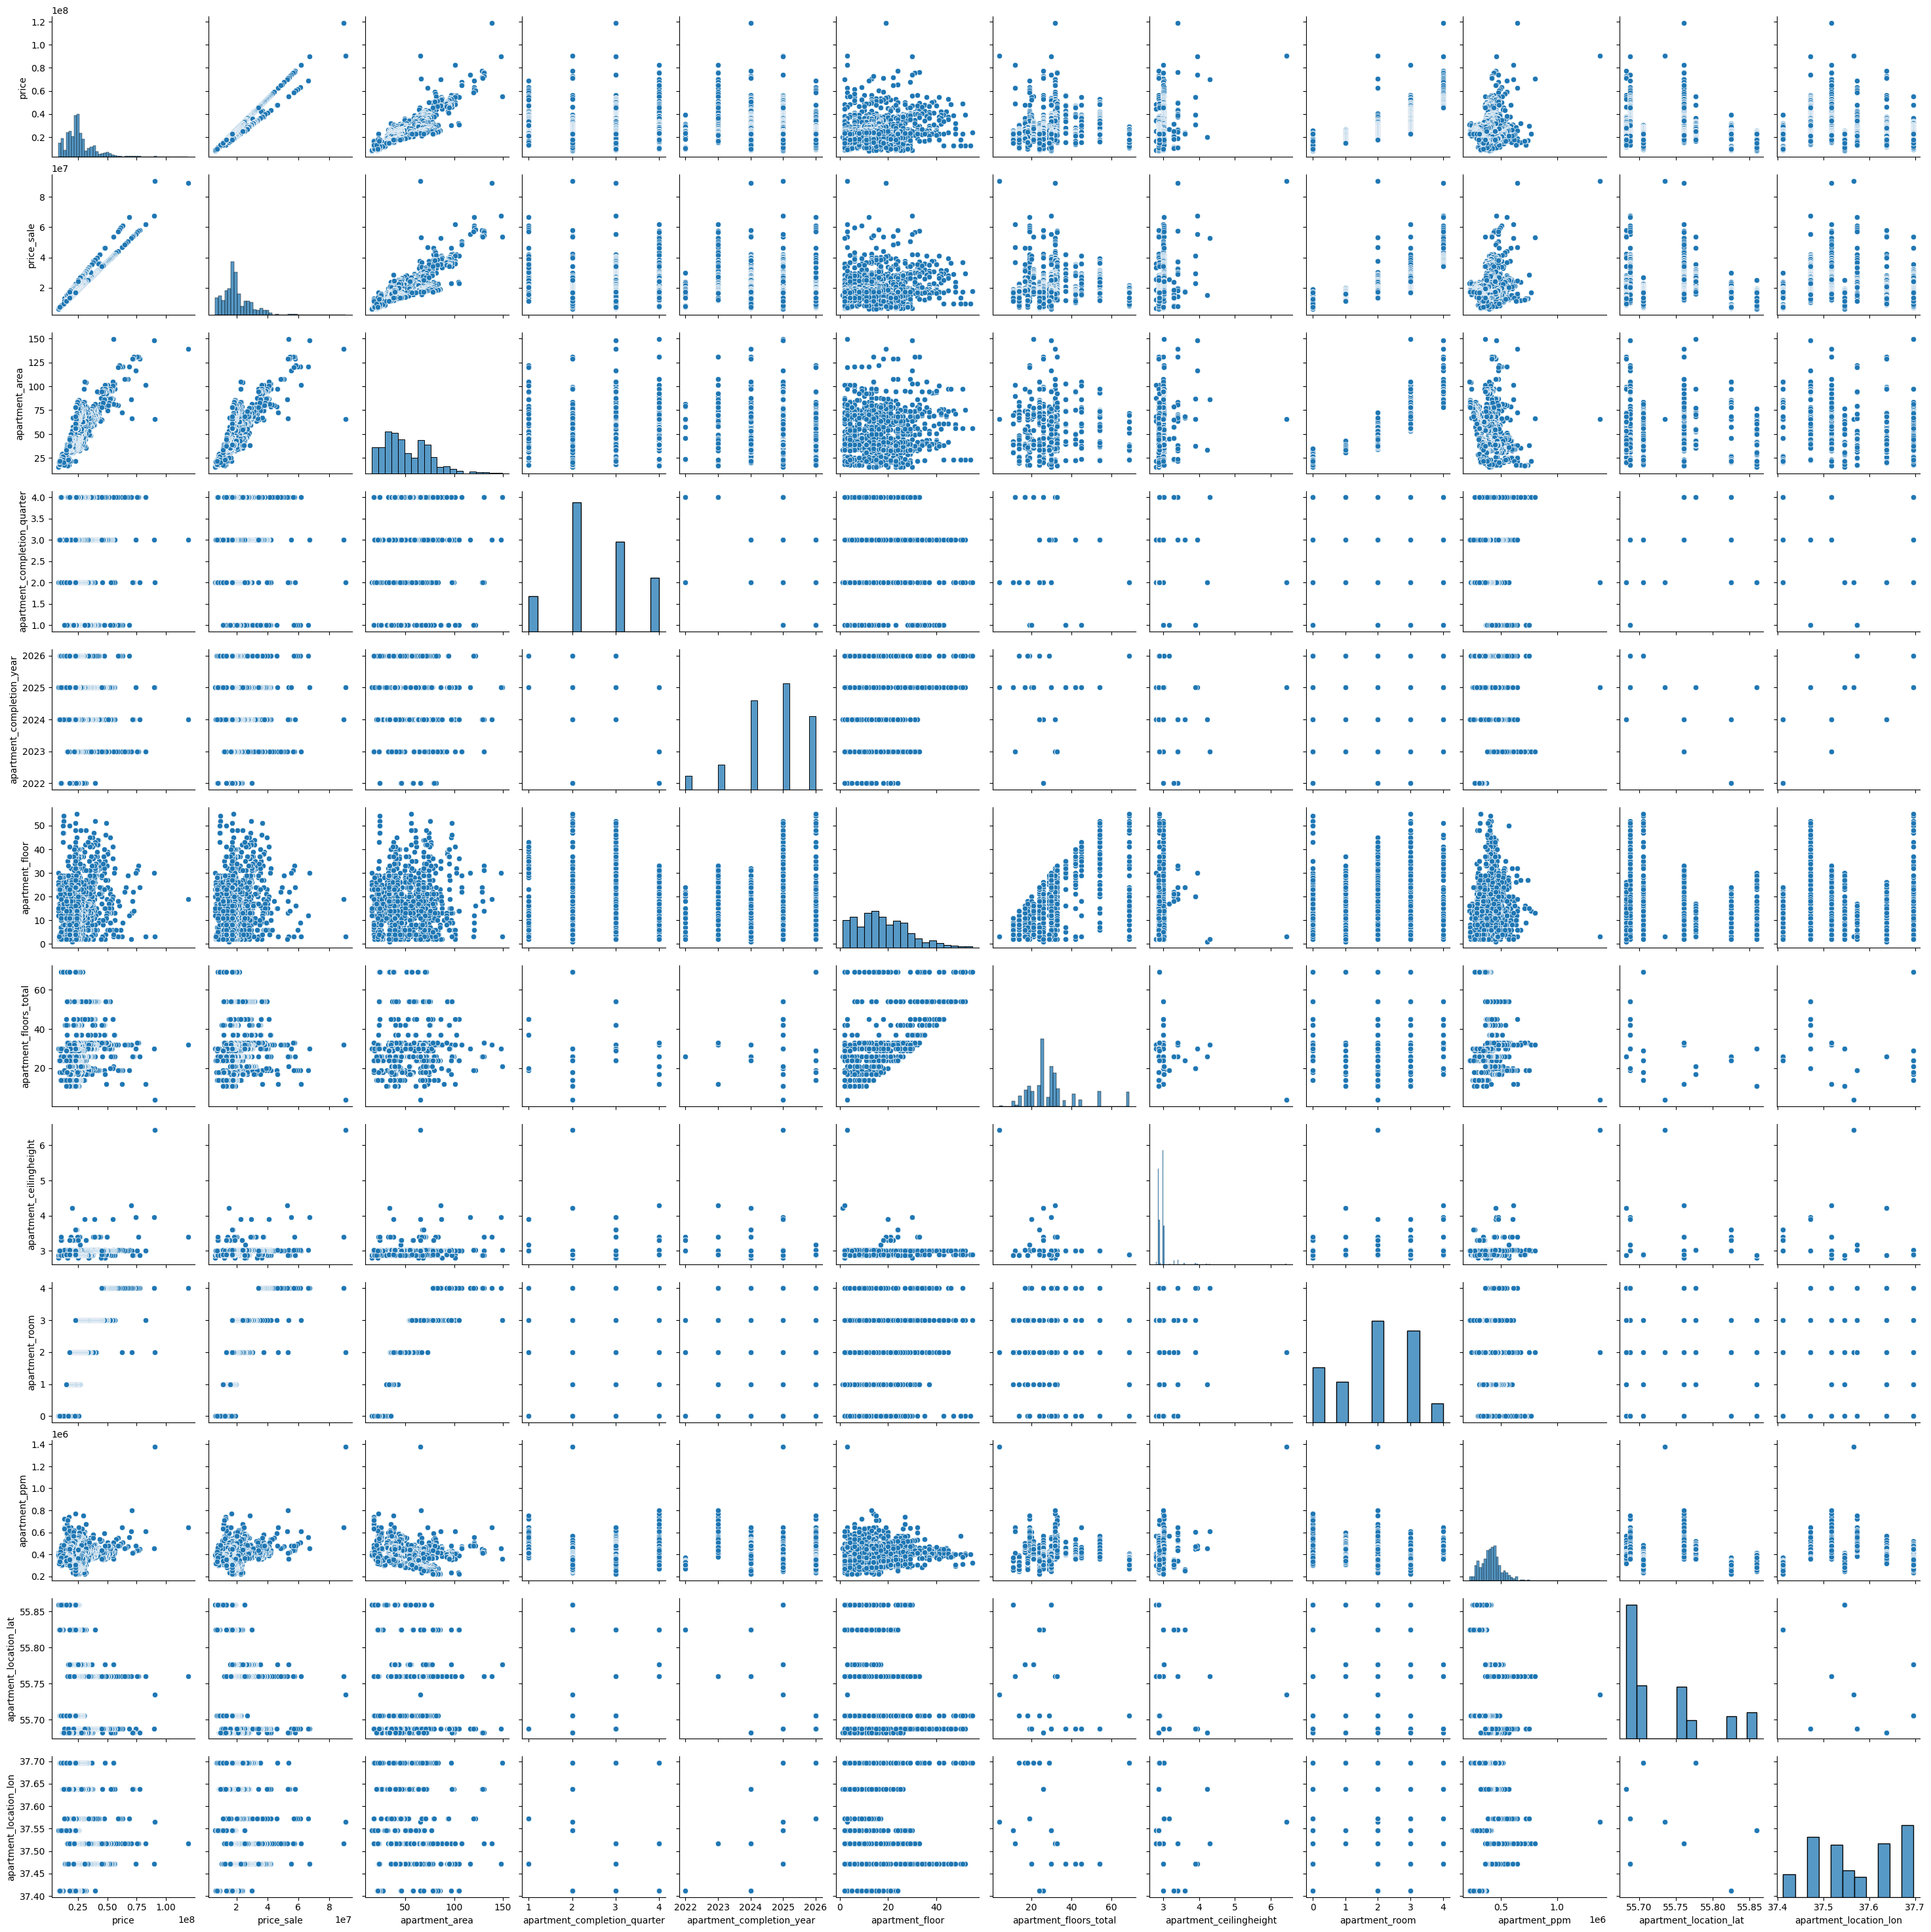

In [19]:

# load the csv
#data = pandas.read_csv("nba.csv")
 
# pairplot
seaborn.pairplot(df)
#plt.show()

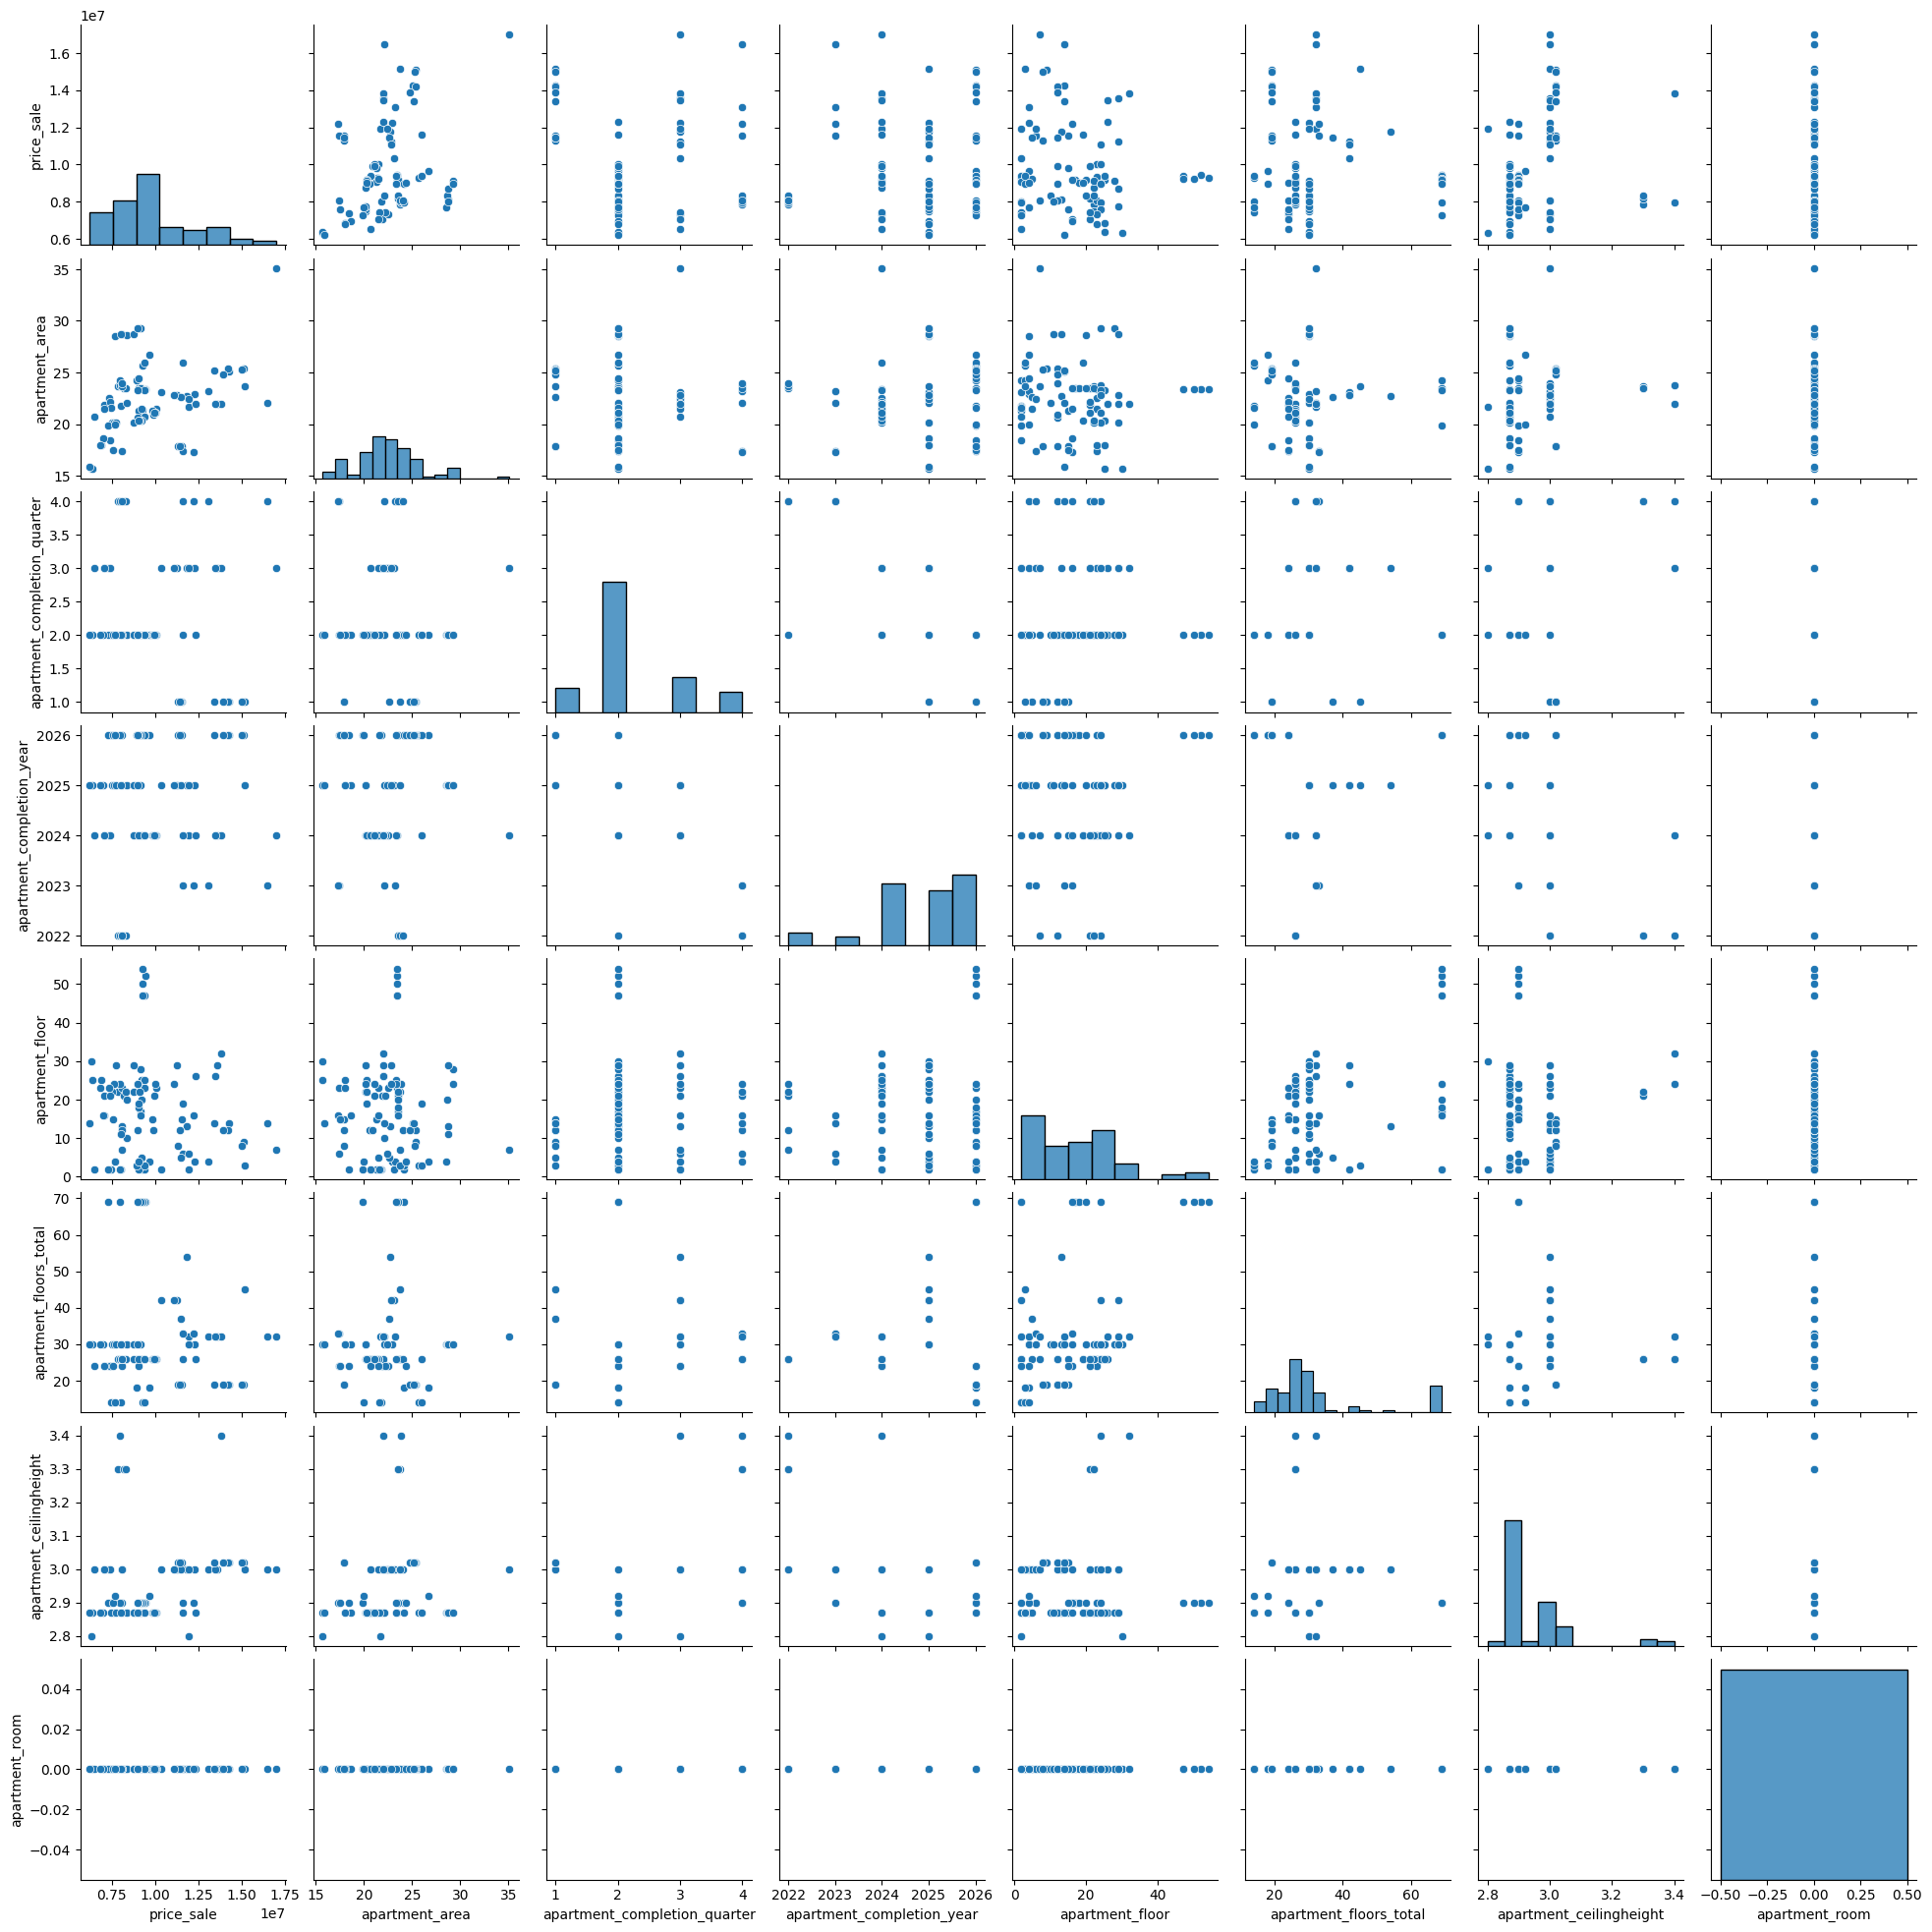

In [20]:
seaborn.pairplot(df.drop(['price', 'apartment_ppm','title', 'datetime_create', 'category', 'source_url', 'apartment_address','apartment_location_lat','apartment_location_lon'], axis=1 ))

# 'price_sale', 

In [24]:
#Хотим спрогнозировать стоимость квартиры?
#2.463307e+07

In [3]:
cursor.execute("""
select 
    title,
    price,
    price_sale,
    datetime_create,
    category,
    --brand,
    --brand_url,
    --description,
    source_url,
    apartment_area,
    apartment_completion_quarter,
    apartment_completion_year,
    apartment_floor,
    apartment_floors_total,
    apartment_ceilingheight,
    apartment_room,
    apartment_ppm,
    apartment_address,
    apartment_location_lat,
    apartment_location_lon
    
from products_history 
where url like "%level.ru%"
   and price_sale < 100000000
order by datetime_create desc
limit 100000
""")
#cursor.fetchall()

df = pd.DataFrame(cursor.fetchall(), columns=[
    "title",
    "price",
    "price_sale",
    "datetime_create",
    "category",
    "source_url",
    "apartment_area",
    "apartment_completion_quarter",
    "apartment_completion_year",
    "apartment_floor",
    "apartment_floors_total",
    "apartment_ceilingheight",
    "apartment_room",
    "apartment_ppm",
    "apartment_address",
    "apartment_location_lat",
    "apartment_location_lon",
])


In [4]:
df = df.dropna()

In [5]:
model = LinearRegression()

In [6]:
df_train = df.drop(['price', 'apartment_ppm', 'price_sale', 'title', 'datetime_create', 'category', 'source_url', 'apartment_address', 'apartment_location_lat', 'apartment_location_lon'], axis=1 )
df_y = df[['price_sale']].copy()

In [7]:
#df_train

In [8]:

#df_y

In [9]:
#np.any(np.isnan(df_train))
#df_train = df_train.reset_index()
#df_train
#df_y = df_y.reset_index()
#df_y

In [10]:
model.fit(df_train, df_y)

LinearRegression()

$ x_1 * k_1 + x_2 * k_2 + b = y $

In [11]:
model.coef_

array([[ 264837.51344953,  -43020.70105366, -215621.85541085,
          66129.62639207,  -40658.41166815, 4330625.58310642,
         931936.23141662]])

In [12]:
# вспоминить что это?
model.intercept_

array([4.27926197e+08])

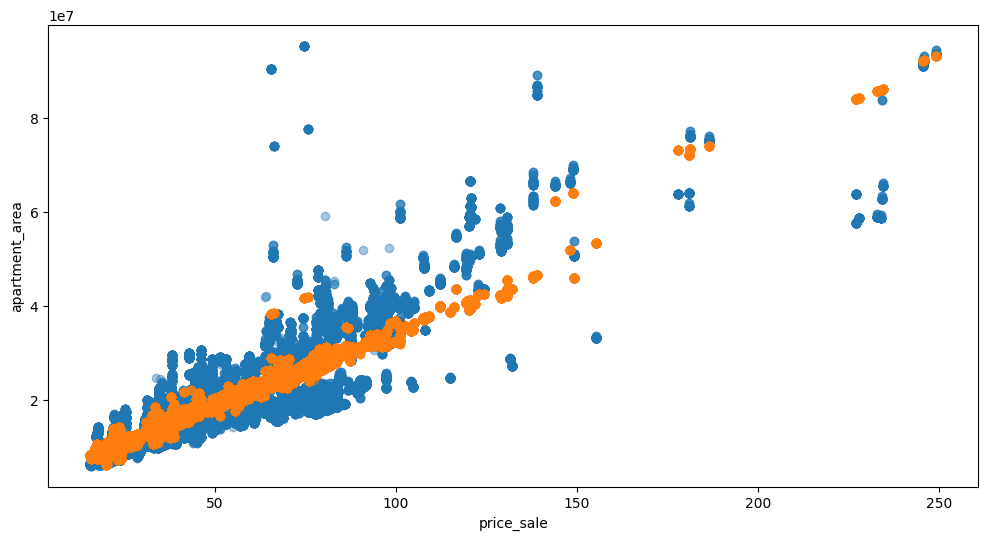

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(df["apartment_area"],df["price_sale"], alpha=0.4)
plt.xlabel("price_sale")
plt.ylabel("apartment_area")
#plt.ylim(10,120)

#plt.plot(df_train, model.predict(df_train))
#plt.plot(df_train['apartment_area'], model.predict(df_train))
plt.scatter(df_train['apartment_area'], model.predict(df_train), alpha=0.4)

In [14]:
# R**2
model.score(df_train, df_y)

0.7724998917123405

$ R^2 = 1 - sum((y - y^)^2) / sum((y - y_)^2) $

In [15]:
#df

In [16]:
#df_t = pd.DataFrame([[66.2,4,2026,30,32,3.00,2,55.760180,37.517482]], columns=["apartment_area","apartment_completion_quarter","apartment_completion_year","apartment_floor","apartment_floors_total","apartment_ceilingheight","apartment_room","apartment_location_lat","apartment_location_lon"])
# 69200322 и с скидкой 48440225
#df_t = pd.DataFrame([[66.2,4,2023,13,32,3.00,2,55.760180,37.517482]], columns=["apartment_area","apartment_completion_quarter","apartment_completion_year","apartment_floor","apartment_floors_total","apartment_ceilingheight","apartment_room","apartment_location_lat","apartment_location_lon"])
df_t = pd.DataFrame([[66.2,4,2023,13,32,3.00,2]], columns=["apartment_area","apartment_completion_quarter","apartment_completion_year","apartment_floor","apartment_floors_total","apartment_ceilingheight","apartment_room"])
model.predict(df_t)

array([[23497709.0261876]])

In [21]:
#model.predict([[66.2,4,2023,13,32,3.00,2,55.760180,37.517482]])
model.predict([[66.2,4,2023,13,32,3.00,2]])

/home/jupyter-amtsu/.local/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[23497709.0261876]])

In [22]:
model.predict(df_train)

array([[ 9351870.02380663],
       [10379598.46284777],
       [ 9071812.31680244],
       ...,
       [19914154.99739671],
       [14262500.47357249],
       [17695797.92137802]])

In [23]:
# не то поставил
#!pip install scrapy

In [24]:
#root@malvina8:/home/jupyter-amtsu# python3 -m pip install xgboost
#Requirement already satisfied: xgboost in /usr/local/lib/python3.8/dist-packages (1.7.3)
#Requirement already satisfied: scipy in /usr/local/lib/python3.8/dist-packages (from xgboost) (1.10.0)
#Requirement already satisfied: numpy in /usr/local/lib/python3.8/dist-packages (from xgboost) (1.24.2)

In [25]:
#!pip install numpy

In [26]:
#!pip install scipy

In [27]:
#!pip install xgboost --no-cache-dir

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, df_y, test_size=0.2, random_state=546)

In [30]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'xgboost'

In [31]:
#xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
#xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 10)

NameError: name 'xgb' is not defined

In [ ]:
xg_reg.fit(X_train,y_train)

In [ ]:
preds = xg_reg.predict(X_test)

In [18]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

NameError: name 'np' is not defined

In [19]:
# средне квадратичное отклонение
-3 * RMSE ~ 3 * RMSE = 0,97

SyntaxError: invalid syntax (3725229129.py, line 2)

In [27]:
xg_reg.predict(df_t)

NameError: name 'xg_reg' is not defined

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df["apartment_area"],df["price_sale"], alpha=0.4)
plt.xlabel("price_sale")
plt.ylabel("apartment_area")
#plt.ylim(10,120)

#plt.plot(df_train, model.predict(df_train))
#plt.plot(df_train['apartment_area'], model.predict(df_train))

plt.scatter(df_train['apartment_area'], model.predict(df_train), alpha=0.4,  color="green")
plt.scatter(df_train['apartment_area'], xg_reg.predict(df_train), alpha=0.4,  color="pink")

plt.scatter(df_t['apartment_area'], model.predict(df_t), alpha=0.4, color="black")
plt.scatter(df_t['apartment_area'], xg_reg.predict(df_t), alpha=0.4, color="red")

#  и с скидкой 
plt.scatter(df_t['apartment_area'], 69200322, alpha=0.4)
plt.scatter(df_t['apartment_area'], 48440225, alpha=0.4)

#plt.scatter(df_train['apartment_area'], model.predict(df_train), alpha=0.4)

In [ ]:
#df_train, df_y

data_dmatrix = xgb.DMatrix(data=df_train,label=df_y)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 15, 'alpha': 30}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=13,
                    num_boost_round=150,early_stopping_rounds=110,metrics="rmse", as_pandas=True, seed=123)


In [ ]:
cv_results.head()


In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))


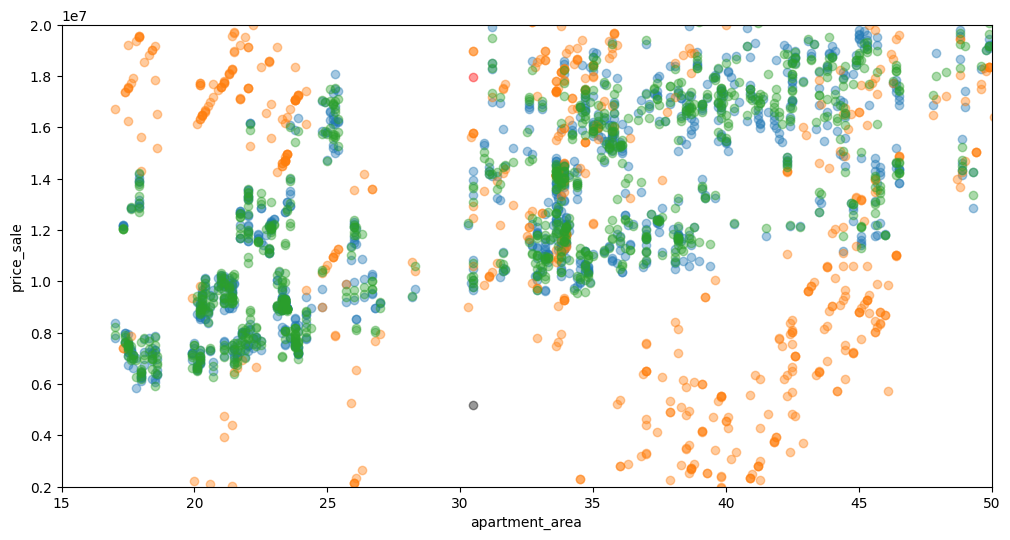

In [54]:
plt.figure(figsize=(12,6))
plt.scatter(df["apartment_area"],df["price_sale"], alpha=0.4)
plt.xlabel("apartment_area")
plt.ylabel("price_sale")
plt.xlim(15, 50)
plt.ylim(2000000, 20000000)


#plt.plot(df_train, model.predict(df_train))
#plt.plot(df_train['apartment_area'], model.predict(df_train))

plt.scatter(df_train['apartment_area'], model.predict(df_train), alpha=0.4)
plt.scatter(df_train['apartment_area'], xg_reg.predict(df_train), alpha=0.4, )

plt.scatter(df_t['apartment_area'], model.predict(df_t), alpha=0.4, color="black")
plt.scatter(df_t['apartment_area'], xg_reg.predict(df_t), alpha=0.4, color="red")

#  и с скидкой 
plt.scatter(df_t['apartment_area'], 69200322, alpha=0.4)
plt.scatter(df_t['apartment_area'], 48440225, alpha=0.4)

#plt.scatter(df_train['apartment_area'], model.predict(df_train), alpha=0.4)

In [ ]:
#df_train = df.drop(['price', 'apartment_ppm', 'price_sale', 'title', 'datetime_create', 'category', 'source_url', 'apartment_address'], axis=1 )
#df_y = df[['price_sale']].copy()

#xg_reg.fit(df,df_y)


In [ ]:
xg_reg.score(X_train,y_train)

In [ ]:
# визуализировать дерево решеней для XGB

# Добавил дни экспозиции и дополнит ельные паремтры

In [40]:
cursor.execute("""
WITH sales_numbered AS (
SELECT 
    id, 
    title,
    price_sale,
    --LEAD(price_sale,1,0) OVER (PARTITION BY title, url, apartment_floor, apartment_room, apartment_area ORDER BY  title, id desc ) AS prev_price_sale,  
    apartment_area,
    
    price,
    datetime_create,
    category,
    url,
    source_url,
--    apartment_completion_quarter,
    apartment_completion_year,
    apartment_floor,
    apartment_floors_total,
--    apartment_ceilingheight,
    apartment_room,
    apartment_ppm,
    apartment_address,
    apartment_location_lat,
    apartment_location_lon,
    
    "2022-12-17" as date_start_import,
    MIN(datetime_create) OVER (PARTITION BY title, url ) as datetime_create_min,
    MAX(datetime_create) OVER (PARTITION BY title, url ) as datetime_create_max,
    julianday(date(MAX(datetime_create) OVER (PARTITION BY title, url ))) - julianday(date(MIN(datetime_create) OVER (PARTITION BY title, url ))) as days_of_exposure,
    
    MIN(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 6 FOLLOWING) as d7_min,
    AVG(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 6 FOLLOWING) as d7_avg,
    MAX(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 6 FOLLOWING) as d7_max,
    
    MIN(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 29 FOLLOWING) as d30_min,
    AVG(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 29 FOLLOWING) as d30_avg,
    MAX(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 29 FOLLOWING) as d30_max,

    MIN(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 89 FOLLOWING) as d90_min,
    AVG(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 89 FOLLOWING) as d90_avg,
    MAX(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 89 FOLLOWING) as d90_max,

    MIN(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 364 FOLLOWING) as d365_min,
    AVG(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 364 FOLLOWING) as d365_avg,
    MAX(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 364 FOLLOWING) as d365_max,
    
    MIN(price_sale) OVER (PARTITION BY title, url ) as all_min,
    AVG(price_sale) OVER (PARTITION BY title, url ) as all_avg,
    MAX(price_sale) OVER (PARTITION BY title, url ) as all_max,

    price_sale - LEAD(price_sale,1,0) OVER (PARTITION BY title, url  ORDER BY title, id desc ) AS diff,
    ROW_NUMBER() OVER(PARTITION BY title, url ORDER BY id desc) AS row_number
FROM products_history
where datetime_create >= "2022-01-17"
    and (
        url like "%level.ru%" 
        or 
        url like "%fr.mos.ru%"
        or
        url like "%samolet.ru%"
    )
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 3000000     
)
SELECT 

    id, 
    title,
    price_sale,
    apartment_area,
    
    price,
    datetime_create,
    category,
    
    
    url,
    
    
    source_url,
--    apartment_completion_quarter,
    apartment_completion_year,
    apartment_floor,
    apartment_floors_total,
--    apartment_ceilingheight,
    apartment_room,
    apartment_ppm,
    apartment_address,
    apartment_location_lat,
    apartment_location_lon,
    
    
    date_start_import,
    datetime_create_min,
    datetime_create_max,
    --date(datetime_create_max),
    --datetime(datetime_create_max),
    --julianday(date(datetime_create_max)) - julianday(date(datetime_create_min)) as days_of_exposure,
    days_of_exposure,
    CASE
        WHEN days_of_exposure < 7 
            THEN 1
        ELSE 0
    END AS d7_sale,
    CASE
        WHEN days_of_exposure >= 7 and days_of_exposure < 40 
--        WHEN days_of_exposure < 40 
            THEN 1
        ELSE 0
    END AS d30_sale,
    CASE
        WHEN days_of_exposure >= 40 and days_of_exposure < 110 
--        WHEN days_of_exposure < 110 
            THEN 1
        ELSE 0
    END AS d90_sale,
    CASE
        WHEN days_of_exposure >= 110 and days_of_exposure < 400 
--        WHEN  days_of_exposure < 400 
            THEN 1
        ELSE 0
    END AS d365_sale,

    d7_min,
    d7_avg,
    d7_max,

    d30_min,
    d30_avg,
    d30_max,

    d90_min,
    d90_avg,
    d90_max,

    d365_min,
    d365_avg,
    d365_max,

    all_min,
    all_avg,
    all_max,
    --price_sale / apartment_area,

    row_number
FROM sales_numbered
WHERE row_number = 1
--Order by days_of_exposure desc;
Order by days_of_exposure asc;

""")



In [41]:
#cursor.fetchall()

In [42]:
df = pd.DataFrame(cursor.fetchall(), columns=[
        
    "id", 
    "title",
    "price_sale",
    "apartment_area",
    
    "price",
    "datetime_create",
    "category",
    "url",
    "source_url",
#    "apartment_completion_quarter",
    "apartment_completion_year",
    "apartment_floor",
    "apartment_floors_total",
#    "apartment_ceilingheight",
    "apartment_room",
    "apartment_ppm",
    "apartment_address",
    "apartment_location_lat",
    "apartment_location_lon",
    
    "date_start_import",
    "datetime_create_min",
    "datetime_create_max",
    "days_of_exposure",
    "d7_sale",
    "d30_sale",
    "d90_sale",
    "d365_sale",

    "d7_min",
    "d7_avg",
    "d7_max",

    "d30_min",
    "d30_avg",
    "d30_max",

    "d90_min",
    "d90_avg",
    "d90_max",

    "d365_min",
    "d365_avg",
    "d365_max",

    "all_min",
    "all_avg",
    "all_max",

    "row_number"
])


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         20400 non-null  int64  
 1   title                      20400 non-null  object 
 2   price_sale                 20400 non-null  int64  
 3   apartment_area             20385 non-null  float64
 4   price                      20400 non-null  int64  
 5   datetime_create            20400 non-null  object 
 6   category                   3816 non-null   object 
 7   url                        20400 non-null  object 
 8   source_url                 20373 non-null  object 
 9   apartment_completion_year  2733 non-null   float64
 10  apartment_floor            19317 non-null  float64
 11  apartment_floors_total     19197 non-null  float64
 12  apartment_room             19317 non-null  float64
 13  apartment_ppm              19317 non-null  flo

In [44]:
#3014

In [45]:
df = df.dropna()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2613 entries, 0 to 20399
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2613 non-null   int64  
 1   title                      2613 non-null   object 
 2   price_sale                 2613 non-null   int64  
 3   apartment_area             2613 non-null   float64
 4   price                      2613 non-null   int64  
 5   datetime_create            2613 non-null   object 
 6   category                   2613 non-null   object 
 7   url                        2613 non-null   object 
 8   source_url                 2613 non-null   object 
 9   apartment_completion_year  2613 non-null   float64
 10  apartment_floor            2613 non-null   float64
 11  apartment_floors_total     2613 non-null   float64
 12  apartment_room             2613 non-null   float64
 13  apartment_ppm              2613 non-null   float64
 

In [47]:
#1748
#1926

Text(0, 0.5, 'price_sale')

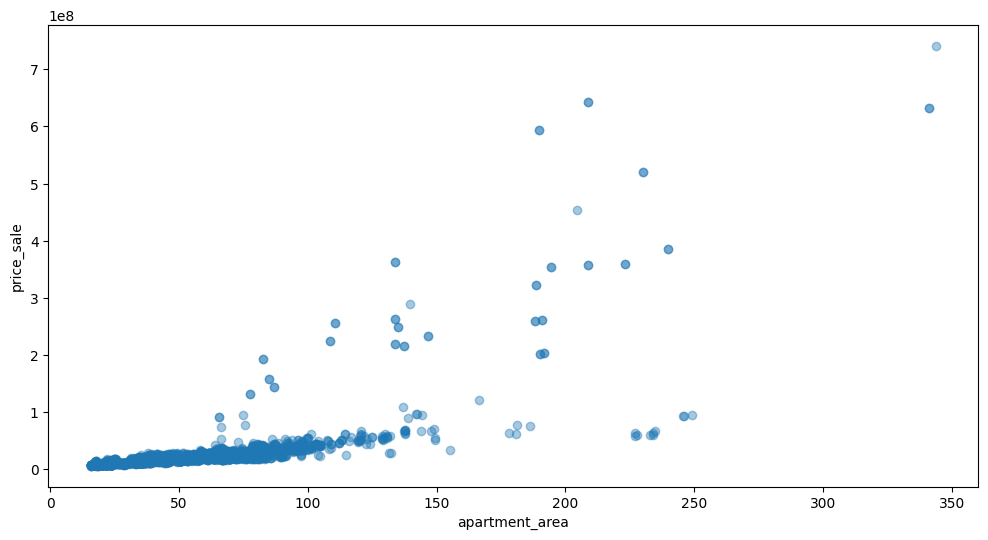

In [48]:
plt.figure(figsize=(12,6))
plt.scatter(df["apartment_area"],df["price_sale"], alpha=0.4)
plt.xlabel("apartment_area")
plt.ylabel("price_sale")
#plt.ylim(10,120)

In [19]:
df_train = df.drop(['price', 'apartment_ppm', 'price_sale', 'title', 'datetime_create', 'category', 'url', 'source_url', 'apartment_address', 'apartment_location_lat', 'apartment_location_lon',       
    "id",

#    "apartment_completion_quarter",
    
    "date_start_import",
    "datetime_create_min",
    "datetime_create_max",
                    
    "days_of_exposure",          
                    
    "d7_min",
    "d7_avg",
    "d7_max",

    "d30_min",
    "d30_avg",
    "d30_max",

    "d90_min",
    "d90_avg",
    "d90_max",

    "d365_min",
    "d365_avg",
    "d365_max",

    "all_min",
    "all_avg",
    "all_max",

    "row_number"
                   
                   ], axis=1 )
df_y = df[['price_sale']].copy()

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, df_y, test_size=0.2, random_state=546)


In [21]:

import xgboost as xgb



ModuleNotFoundError: No module named 'xgboost'

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [23]:

#xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
#xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

NameError: name 'xgb' is not defined

NameError: name 'preds' is not defined

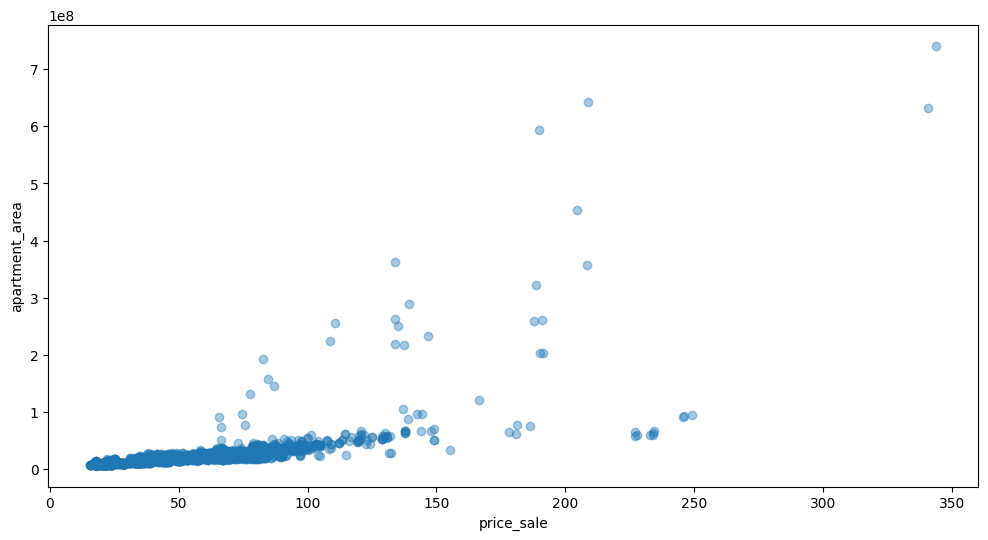

In [24]:
plt.figure(figsize=(12,6))
plt.scatter(df["apartment_area"],df["price_sale"], alpha=0.4)
plt.xlabel("price_sale")
plt.ylabel("apartment_area")
#plt.ylim(10,120)

#plt.plot(df_train, model.predict(df_train))
#plt.plot(df_train['apartment_area'], model.predict(df_train))
plt.scatter(X_test['apartment_area'], preds, alpha=0.4)


In [25]:
filename = 'calculate_price_apartment/model_xgb.sav'
xg_reg.save_model(filename)

NameError: name 'xg_reg' is not defined

In [26]:
pwd

'/home/jupyter-amtsu/github/team22/library/theory'

In [27]:
import pickle
filename = 'calculate_price_apartment/model_xgb.sav'
pickle.dump(xg_reg, open(filename, 'wb'))

NameError: name 'xg_reg' is not defined

In [28]:
df_t = pd.DataFrame([[30,2023,13,32,1,0,1,0,0]], columns=[
    "apartment_area",
#    "apartment_completion_quarter",
    "apartment_completion_year",
    "apartment_floor",
    "apartment_floors_total",
#    "apartment_ceilingheight",
    "apartment_room",

    "d7_sale",
    "d30_sale", 
    "d90_sale",
    "d365_sale"
])
 

xg_reg.predict(df_t)

NameError: name 'xg_reg' is not defined

In [29]:
model = LinearRegression()


model.fit(df_train, df_y)

LinearRegression()

In [30]:
model.coef_

array([[ 1.38367722e+06,  2.77455342e+06, -1.71420938e+03,
        -2.61345310e+05, -1.92801137e+07, -2.12103382e+06,
        -2.21438644e+06,  1.78871440e+06,  2.54670586e+06]])

In [31]:
model.intercept_

array([-5.62147388e+09])

In [32]:
import pickle

In [33]:
filename = 'calculate_price_apartment/model.sav'
pickle.dump(model, open(filename, 'wb'))

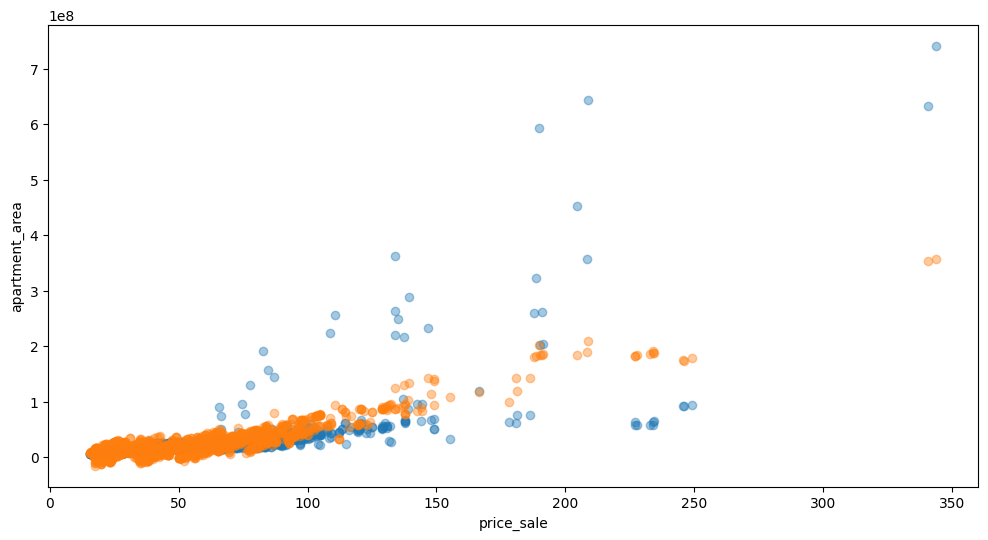

In [34]:
plt.figure(figsize=(12,6))
plt.scatter(df["apartment_area"],df["price_sale"], alpha=0.4)
plt.xlabel("price_sale")
plt.ylabel("apartment_area")
#plt.ylim(10,120)

#plt.plot(df_train, model.predict(df_train))
#plt.plot(df_train['apartment_area'], model.predict(df_train))
plt.scatter(df_train['apartment_area'], model.predict(df_train), alpha=0.4)


In [35]:
#df_t = pd.DataFrame([[30.5,4,2023,13,32,3.00,1]], columns=[
#    "apartment_area",
#    "apartment_completion_quarter",
#    "apartment_completion_year",
#    "apartment_floor",
#    "apartment_floors_total",
#    "apartment_ceilingheight",
#    "apartment_room"])

#price', 'apartment_ppm', 'price_sale', 'title', 'datetime_create', 'category', 'source_url', 
#'apartment_address', 'apartment_location_lat', 'apartment_location_lon',       
#    "date_start_import",
#    "datetime_create_min",
#    "datetime_create_max"

#", 
#df_t = pd.DataFrame([[30.5,4,2023,13,32,3.00,1,0,1,0,0]], columns=[
#df_t = pd.DataFrame([[30.5,2023,3,32,3.00,1,0,1,0,0]], columns=[
df_t = pd.DataFrame([[30.5,2023,3,32,1,0,1,0,0]], columns=[


    "apartment_area",
#    "apartment_completion_quarter",
    "apartment_completion_year",
    "apartment_floor",
    "apartment_floors_total",
#    "apartment_ceilingheight",
    "apartment_room",


    "d7_sale",
    "d30_sale", 
    "d90_sale",
    "d365_sale"
])
 

model.predict(df_t)

array([[3787152.9044199]])

In [36]:
#df_t = pd.DataFrame([[30.5,2023,13,32,3.00,1,0,1,0,0]], columns=[
df_t = pd.DataFrame([[30.5,2023,13,32,1,0,1,0,0]], columns=[


    "apartment_area",
#    "apartment_completion_quarter",
    "apartment_completion_year",
    "apartment_floor",
    "apartment_floors_total",
#    "apartment_ceilingheight",
    "apartment_room",


    "d7_sale",
    "d30_sale", 
    "d90_sale",
    "d365_sale"
])
 

model.predict(df_t)

array([[3770010.81060982]])

In [37]:
# высиялюю изменние средней площади квадратного метра по дням / неделям

In [38]:
cursor.execute("""
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as int),
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where datetime_create >= "2022-01-17"
    and url like "%level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 4
""")

#cursor.fetchall()


df = pd.DataFrame(cursor.fetchall(), columns=[
    "id", 
    "price_sale",
    "apartment_area",
    "price per metr",
    "date"
])


In [39]:
df

id  price_sale  apartment_area  price per metr        date
0  11557925     8022023              21   367982.706422  2023-05-01
1  11557924     6326481              15   402960.573248  2023-05-01
2  11557923    14644406              20   728577.412935  2023-05-01
3  11557922     7041059              21   321509.543379  2023-05-01

In [40]:
df.describe()

id    price_sale  apartment_area  price per metr
count  4.000000e+00  4.000000e+00        4.000000        4.000000
mean   1.155792e+07  9.008492e+06       19.250000   455257.558996
std    1.290994e+00  3.821022e+06        2.872281   185242.317744
min    1.155792e+07  6.326481e+06       15.000000   321509.543379
25%    1.155792e+07  6.862414e+06       18.750000   356364.415661
50%    1.155792e+07  7.531541e+06       20.500000   385471.639835
75%    1.155792e+07  9.677619e+06       21.000000   484364.783170
max    1.155792e+07  1.464441e+07       21.000000   728577.412935

In [41]:
import re

In [42]:
cursor.execute("""
SELECT 
    id, 
    title,
    price_sale,
    apartment_area,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale as decimal(15,2)) / CAST(apartment_area as decimal(15,2)),
    --*,
    date(datetime_create) as date
    
FROM products_history
where 
    datetime_create <= "2023-02-10"
    and url like "%level.ru%"
--    and apartment_area = ""
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id asc
LIMIT 1000000
""")

for i in cursor.fetchall():
    title = i[1]
    iid = i[0]
    aa = i[3]
    datee = i[6]
    result = re.search(r'\d\d\d?\.\d', title)
    mm = 0
    if result:
        mm = result.group(0)
#    if not aa:
#        print(aa , '!=', mm, datee)
#    elif float(aa) != float(mm):  
#        print(iid, mm, title)
        
    #update
#    print( f"""UPDATE products_history
#SET apartment_area = '{mm}'
#WHERE id = '{iid}';
#""")
    print(iid)
    cursor.execute(f"""UPDATE products_history
SET apartment_area = '{mm}'
WHERE id = '{iid}';
""")

648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897


69789
69790
69791
69792
69793
69794
69795
69796
69797
69798
69799
69800
69801
69802
69803
69804
69805
69806
69807
69808
69809
69810
69811
69812
69813
69814
69815
69816
69817
69818
69819
69820
69821
69822
69823
69824
69825
69826
69827
69828
69829
69830
69831
69832
69833
69834
69835
69836
69837
69838
69839
69840
69841
69842
69843
69844
69845
69846
69847
69848
69849
69850
69851
69852
69853
69854
69855
69856
69857
69858
69859
69860
69861
69862
69863
69864
69865
69866
69867
69868
69869
69870
69871
69872
69873
69874
69875
69876
69877
69878
69879
69880
69881
69882
69883
69884
69885
69886
69887
69888
69889
69890
69891
69892
69893
69894
69895
69896
69897
69898
69899
69900
69901
69902
69903
69904
69905
69906
69907
69908
69909
69910
69911
69912
69913
69914
69915
69916
69917
69918
69919
69920
69921
69922
69923
69924
69925
69926
69927
69928
69929
69930
69931
69932
69933
69934
69935
69936
69937
69938
69939
69940
69941
69942
69943
69944
69945
69946
69947
69948
69949
69950
69951
69952
69953
69954
6995

548745
548746
548747
548748
548749
548750
548751
548752
548753
548754
548755
548756
548757
548758
548759
548760
548761
548762
548763
548764
548765
548766
548767
548768
548769
548770
548771
548772
548773
548774
548775
548776
548777
548778
548779
548780
548781
548782
548783
548784
548785
548786
548787
548788
548789
548790
548791
548792
548793
548794
548795
548796
548797
548798
548799
548800
548801
548802
548803
548804
548805
548806
548807
548808
548809
548810
548811
548812
548813
548814
548815
548816
548817
548818
548819
548820
548821
548822
548823
548824
548825
548826
548827
548828
548829
548830
548831
548832
548833
548834
548835
548836
548837
548838
548839
548840
548841
548842
548843
548844
548845
548846
548847
548848
548849
548850
548851
548852
548853
548854
548855
548856
548857
548858
548859
548860
548861
548862
548863
548864
548865
548866
548867
548868
548869
548870
548871
548872
548873
548874
548875
548876
548877
548878
548879
548880
548881
548882
548883
548884
548885
548886
548887

845313
845314
845315
845316
845317
845318
845319
845320
845321
845322
845323
845324
845325
845326
845327
845328
845329
845330
845331
845332
845333
845334
845335
845336
845337
845338
845339
845340
845341
845342
845343
845344
845345
845346
845347
845348
845349
845350
845351
845352
845353
845354
845355
845356
845357
845358
845359
845360
845361
845362
845363
845364
845365
845366
845367
845368
845369
845370
845371
845372
845373
845374
845375
845376
845377
845378
845379
845380
845381
845382
845383
845384
845385
845386
845387
845388
845389
845390
845391
845392
845393
845394
845395
845396
845397
845398
845399
845400
845401
845402
845403
845404
845405
845406
845407
845408
845409
845410
845411
845412
845413
845414
845415
845416
845417
845418
845419
845420
845421
845422
845423
845424
845425
845426
845427
845428
845429
845430
845431
845432
845433
845434
845435
845436
845437
845438
845439
845440
845441
845442
845443
845444
845445
845446
845447
845448
845449
845450
845451
845452
845453
845454
845455

1295674
1295675
1295676
1295677
1295678
1295679
1295680
1295681
1295682
1295683
1295684
1295685
1295686
1295687
1295688
1295689
1295690
1295691
1295692
1295693
1295694
1295695
1295696
1295697
1295698
1295699
1295700
1295701
1295702
1295703
1295704
1295705
1295706
1295707
1295708
1295709
1295710
1295711
1295712
1295713
1295714
1295715
1295716
1295717
1295718
1295719
1295720
1295721
1295722
1295723
1295724
1295725
1295726
1295727
1295728
1295729
1295730
1295731
1295732
1295733
1295734
1295735
1295736
1295737
1295738
1295739
1295740
1295741
1295742
1295743
1295744
1295745
1295746
1295747
1295748
1295749
1295750
1295751
1295752
1295753
1295754
1295755
1295756
1295757
1295758
1295759
1295760
1295761
1295762
1295763
1295764
1295765
1295766
1295767
1295768
1295769
1295770
1295771
1295772
1295773
1295774
1295775
1295776
1295777
1295778
1295779
1295780
1295781
1295782
1295783
1295784
1295785
1295786
1295787
1295788
1295789
1295790
1295791
1295792
1295793
1295794
1295795
1295796
1295797
1295798


1888782
1888783
1888784
1888785
1888786
1888787
1888788
1888789
1888790
1888791
1888792
1888793
1888794
1888795
1888796
1888797
1888798
1888799
1888800
1888801
1888802
1888803
1888804
1888805
1888806
1888807
1888808
1888809
1888810
1888811
1888812
1888813
1888814
1888815
1888816
1888817
1888818
1888819
1888820
1888821
1888822
1888823
1888824
1888825
1888826
1888827
1888828
1888829
1888830
1888831
1888832
1888833
1888834
1888835
1888836
1888837
1888838
1888839
1888840
1888841
1888842
1888843
1888844
1888845
1888846
1888847
1888848
1888849
1888850
1888851
1888852
1888853
1888854
1888855
1888856
1888857
1888858
1888859
1888860
1888861
1888862
1888863
1888864
1888865
1888866
1888867
1888868
1888869
1888870
1888871
1888872
1888873
1888874
1888875
1888876
1888877
1888878
1888879
1888880
1888881
1888882
1888883
1888884
1888885
1888886
1888887
1888888
1888889
1888890
1888891
1888892
1888893
1888894
1888895
1888896
1888897
1888898
1888899
1888900
1888901
1888902
1888903
1888904
1888905
1888906


2378876
2378877
2378878
2378879
2378880
2378881
2378882
2378883
2378884
2378885
2378886
2378887
2378888
2378889
2378890
2378891
2378892
2378893
2378894
2378895
2378896
2378897
2378898
2378899
2378900
2378901
2378902
2378903
2378904
2378905
2378906
2378907
2378908
2378909
2378910
2378911
2378912
2378913
2378914
2378915
2378916
2378917
2378918
2378919
2378920
2378921
2378922
2378923
2378924
2378925
2378926
2378927
2378928
2378929
2378930
2378931
2378932
2378933
2378934
2378935
2378936
2378937
2378938
2378939
2378940
2378941
2378942
2378943
2378944
2378945
2378946
2378947
2378948
2378949
2378950
2378951
2378952
2378953
2378954
2378955
2378956
2378957
2378958
2378959
2378960
2378961
2378962
2378963
2378964
2378965
2378966
2378967
2378968
2378969
2378970
2378971
2378972
2378973
2378974
2378975
2378976
2378977
2378978
2378979
2378980
2378981
2378982
2378983
2378984
2378985
2378986
2378987
2378988
2378989
2378990
2378991
2378992
2378993
2378994
2378995
2378996
2378997
2378998
2378999
2379000


3016258
3016259
3016260
3016261
3016262
3016263
3016264
3016265
3016266
3016267
3016268
3016269
3016270
3016271
3016272
3016273
3016274
3016275
3016276
3016277
3016278
3016279
3016280
3016281
3016282
3016283
3016284
3016285
3016286
3016287
3016288
3016289
3016290
3016291
3016292
3016293
3016294
3016295
3016296
3016297
3016298
3016299
3016300
3016301
3016302
3016303
3016304
3016305
3016306
3016307
3016308
3016309
3016310
3016311
3016312
3016313
3016314
3016315
3016316
3016317
3016318
3016319
3016320
3016321
3016322
3016323
3016324
3016325
3016326
3016327
3016328
3016329
3016330
3016331
3016332
3016333
3016334
3016335
3016336
3016337
3016338
3016339
3016340
3016341
3016342
3016343
3016344
3016345
3016346
3016347
3016348
3016349
3016350
3016351
3016352
3016353
3016354
3016355
3016356
3016357
3016358
3016359
3016360
3016361
3016362
3016363
3016364
3016365
3016366
3016367
3016368
3016369
3016370
3016371
3016372
3016373
3016374
3016375
3016376
3016377
3016378
3016379
3016380
3016381
3016382


3655669
3655670
3655671
3655672
3655673
3655674
3655675
3655676
3655677
3655678
3655679
3655680
3655681
3655682
3655683
3655684
3655685
3655686
3655687
3655688
3655689
3655690
3655691
3655692
3655693
3655694
3655695
3655696
3655697
3655698
3655699
3655700
3655701
3655702
3655703
3655704
3655705
3655706
3655707
3655708
3655709
3655710
3655711
3655712
3655713
3655714
3655715
3655716
3655717
3655718
3655719
3655720
3655721
3655722
3655723
3655724
3655725
3655726
3655727
3655728
3655729
3655730
3655731
3655732
3655733
3655734
3655735
3655736
3655737
3655738
3655739
3655740
3655741
3655742
3655743
3655744
3655745
3655746
3655747
3655748
3655749
3655750
3655751
3655752
3655753
3655754
3655755
3655756
3655757
3655758
3655759
3655760
3655761
3655762
3655763
3655764
3655765
3655766
3655767
3655768
3655769
3655770
3655771
3655772
3655773
3655774
3655775
3655776
3655777
3655778
3655779
3655780
3655781
3655782
3655783
3655784
3655785
3655786
3655787
3655788
3655789
3655790
3655791
3655792
3655793


4158890
4158891
4158892
4158893
4158894
4158895
4158896
4158897
4158898
4158899
4158900
4158901
4158902
4158903
4158904
4158905
4158906
4158907
4158908
4158909
4158910
4158911
4158912
4158913
4158914
4158915
4158916
4158917
4158918
4158919
4158920
4158921
4158922
4158923
4158924
4158925
4158926
4158927
4158928
4158929
4158930
4158931
4158932
4158933
4158934
4158935
4158936
4158937
4158938
4158939
4158940
4158941
4158942
4158943
4158944
4158945
4158946
4158947
4158948
4158949
4158950
4158951
4158952
4158953
4158954
4158955
4158956
4158957
4158958
4158959
4158960
4158961
4158962
4158963
4158964
4158965
4158966
4158967
4158968
4158969
4158970
4158971
4158972
4158973
4158974
4158975
4158976
4158977
4158978
4158979
4158980
4158981
4158982
4158983
4158984
4158985
4158986
4158987
4158988
4158989
4158990
4158991
4158992
4158993
4158994
4158995
4158996
4158997
4158998
4158999
4159000
4159001
4159002
4159003
4159004
4159005
4159006
4159007
4159008
4159009
4159010
4159011
4159012
4159013
4159014


4726537
4726538
4726539
4726540
4726541
4726542
4726543
4726544
4726545
4726546
4726547
4726548
4726549
4726550
4726551
4726552
4726553
4726554
4726555
4726556
4726557
4726558
4726559
4726560
4726561
4726562
4726563
4726564
4726565
4726566
4726567
4726568
4726569
4726570
4726571
4726572
4726573
4726574
4726575
4726576
4726577
4726578
4726579
4726580
4726581
4726582
4726583
4726584
4726585
4726586
4726587
4726588
4726589
4726590
4726591
4726592
4726593
4726594
4726595
4726596
4726597
4726598
4726599
4726600
4726601
4726602
4726603
4726604
4726605
4726606
4726607
4726608
4726609
4726610
4726611
4726612
4726613
4726614
4726615
4726616
4726617
4726618
4726619
4726620
4726621
4726622
4726623
4726624
4726625
4726626
4726627
4726628
4726629
4726630
4726631
4726632
4726633
4726634
4726635
4726636
4726637
4726638
4726639
4726640
4726641
4726642
4726643
4726644
4726645
4726646
4726647
4726648
4726649
4726650
4726651
4726652
4726653
4726654
4726655
4726656
4726657
4726658
4726659
4726660
4726661


In [43]:
connection.commit()

In [44]:
#5008519
cursor.execute("""
SELECT 
    id, 
    title,
    price_sale,
    apartment_area
    
FROM products_history
where 
    id = 4726131
""")

cursor.fetchall()

[(4726131,
  'Стрешнево Юг 22 98.4 Волоколамское ш., д. 81, корп. 2 55.82495356307498,37.411886931513436',
  32039184,
  98.4)]

In [45]:
cursor.execute("""
WITH sales_numbered AS (
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where 
    --datetime_create >= "2022-01-17"
     url like "%level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id asc
LIMIT 1431
)
SELECT 
    cast(sum(price_sale) as int),
    cast(sum(apartment_area) as int),
    cast(avg(price_sale / apartment_area) as int),
    cast(sum(price_sale) / sum(apartment_area) as int),
    date
    
FROM sales_numbered

group by date
ORDER BY date
LIMIT 331  
""")

#cursor.fetchall()


df = pd.DataFrame(cursor.fetchall(), columns=[
    "sum price_sale",
    "sum apartment_area",
    "avg price per metr",
    "avg sum price per sum metr",
    "date"
])


In [46]:
df

sum price_sale  sum apartment_area  avg price per metr   
0     32334941046               68096              406989  \
1      9252261472               21612              347216   

   avg sum price per sum metr        date  
0                      474839  2022-12-05  
1                      428103  2022-12-06

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sqlite3
import json

# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

#connection = sqlite3.connect('/tmp/sql_dump/db.sqlite3')
connection = sqlite3.connect('/home/jupyter-amtsu/project/price_alert/db.sqlite3')
cursor = connection.cursor()

In [2]:
# подгот овка средних

# исключить гаражи

cursor.execute("""
WITH sales_numbered AS (
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where 
--datetime_create >= "2022-01-17"
    --and 
    url like "%level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 1431111
)
SELECT 
    cast(sum(price_sale) as int),
    cast(sum(apartment_area) as int),
    cast(avg(price_sale / apartment_area) as int),
    cast(sum(price_sale) / sum(apartment_area) as int),
    avg(apartment_area),
    avg(price_sale),
    count(id),
    date
    
FROM sales_numbered

group by date
ORDER BY date
LIMIT 331  
""")

#cursor.fetchall()


df = pd.DataFrame(cursor.fetchall(), columns=[
    "sum price_sale",
    "sum apartment_area",
    "avg price per metr",
    "avg sum price per sum metr",
    "avg apartment_area",
    "avg price",
    "count",
    "date"
])


In [3]:
df

sum price_sale  sum apartment_area  avg price per metr   
0       32334941046             68096.0            406989.0  \
1       30696512003             67179.0            397938.0   
2       30559637400             66794.0            398361.0   
3       30209952834             66136.0            397052.0   
4       30307550429             66438.0            397075.0   
5       30343321095             66328.0            398268.0   
6       30034772231             66288.0            395448.0   
7       29991524065             66147.0            395574.0   
8       29863034824             65691.0            396268.0   
9       29837910937             65549.0            396862.0   
10      30136225876             66511.0            395505.0   
11      29768570184             65633.0            395154.0   
12      31160291393             68388.0            400211.0   
13      31781263429             69010.0            402714.0   
14      31726087324             68856.0            402831.0   
15      31486613877             68149.0            403513.0   
16      31548308252             68145.0            404388.0   
17      31637094155             68269.0            405164.0   
18      31436265383             67640.0            405775.0   
19      31457721927             67532.0            406705.0   
20      31289509667             67102.0            406767.0   
21      31135844571             66730.0            406750.0   
22      31374993489             67539.0            405192.0   
23      31417976675             67560.0            405720.0   
24      31412807680             67436.0            406931.0   
25      31272910517             67172.0            406216.0   
26      31298558618             66997.0            407593.0   
27      31314394420             67021.0            407768.0   
28      31314394420             67021.0            407768.0   
29      31314394420             67021.0            407768.0   
30      31314394420             67021.0            407768.0   
31      31314394420             67021.0            407768.0   
32      31314394420             67021.0            407768.0   
33      31070929123             66386.0            407908.0   
34      31060292331             66363.0            407856.0   
35      30965120163             66151.0            407604.0   
36      30849204746             65835.0            407882.0   
37      29275035359             65787.0            401011.0   
38      30841981864             65609.0            408595.0   
39      30889666759             65627.0            409211.0   
40      30749709083             65174.0            409844.0   
41      30692156169             65956.0            407331.0   
42      25287836453             52539.0            404574.0   
43      27846557662             61330.0            401162.0   
44      30476705835             64918.0            407619.0   
45      30734049440             65517.0            407949.0   
46      31669129135             68489.0            402260.0   
47      31541442853             68318.0            401595.0   
48      32135259204             69480.0            404103.0   
49      31925978758             68952.0            404201.0   
50      31717104729             68592.0            402452.0   
51      31934953760             69000.0            403331.0   
52      31821867788             68697.0            403634.0   
53      31646596871             68093.0            404562.0   
54      31925608021             68637.0            406082.0   
55      32008096670             68821.0            406159.0   
56      31761931155             68241.0            405944.0   
57      31546022966             67629.0            406252.0   
58      31393136031             67119.0            406964.0   
59      34620789696             68792.0            421462.0   
60      30682269516             66801.0            405824.0   
61      30788227815             67047.0            405978.0   
62      30605491638             6654

In [ ]:
#2023-04-14
# подгот овка средних
cursor.execute("""
SELECT 
    id, 
    url
FROM products_history
where 
    datetime_create = "2023-04-14"
    and 
    url like "%level.ru%"
ORDER BY id desc
LIMIT 14
""")

cursor.fetchall()


In [17]:
30307550429 / 66438.0

456177.9467924983

In [4]:
df = df.dropna()

Text(0, 0.5, '2')

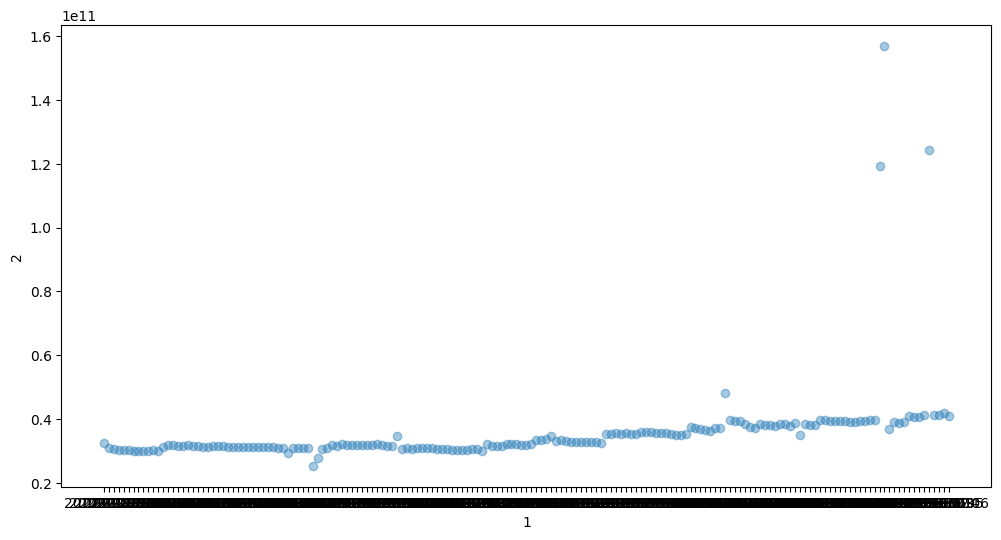

In [5]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["sum price_sale"], alpha=0.4)
plt.xlabel("1")
plt.ylabel("2")
#plt.ylim(10,120)

Text(0, 0.5, '2')

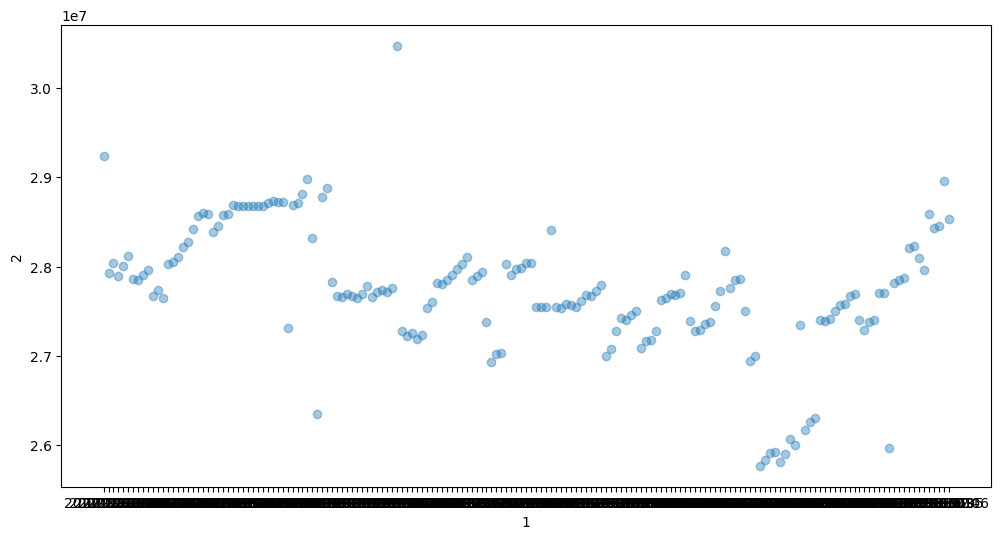

In [6]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["sum price_sale"]/df["count"], alpha=0.4)
plt.xlabel("1")
plt.ylabel("2")
#plt.ylim(10,120)

Text(0, 0.5, '2')

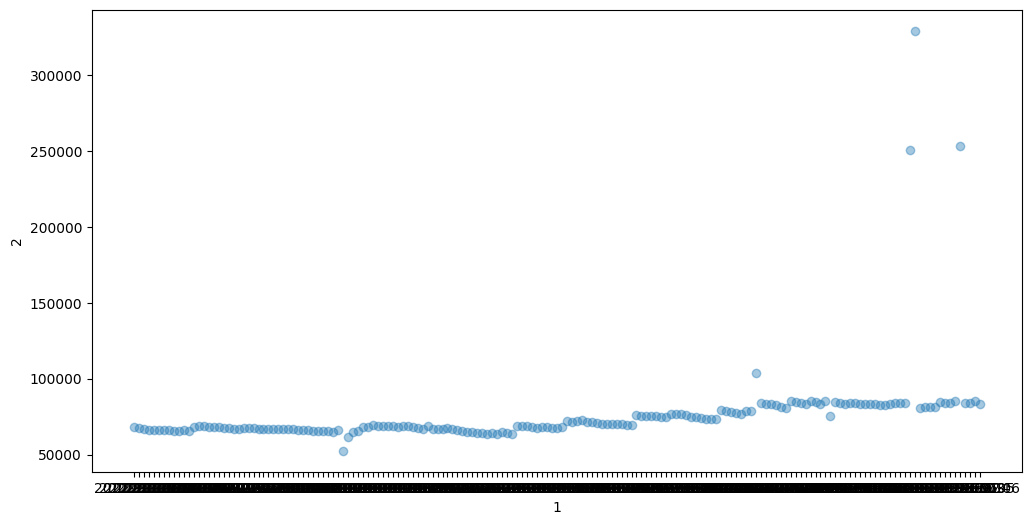

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["sum apartment_area"], alpha=0.4)
plt.xlabel("1")
plt.ylabel("2")
#plt.ylim(10,120)

Text(0, 0.5, '2')

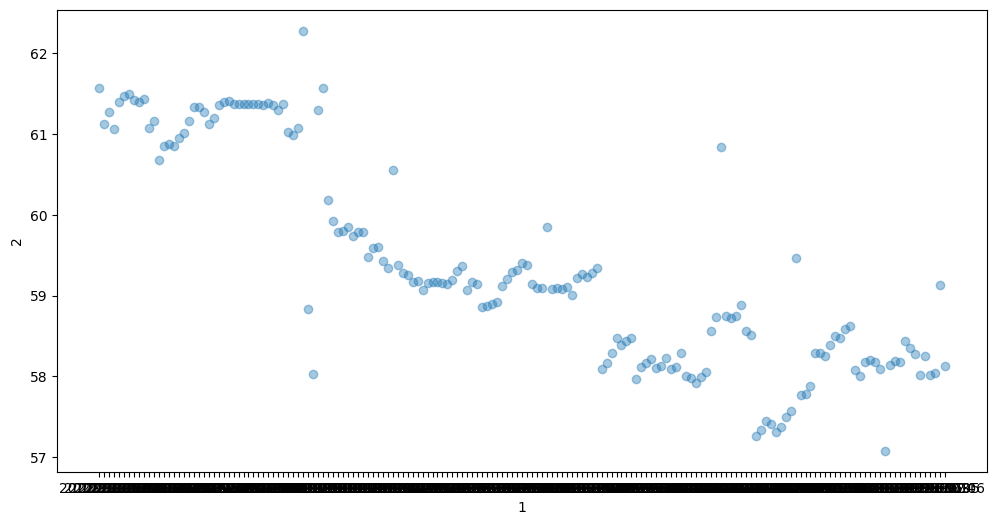

In [8]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["sum apartment_area"]/df["count"], alpha=0.4)
plt.xlabel("1")
plt.ylabel("2")
#plt.ylim(10,120)

Text(0, 0.5, '2')

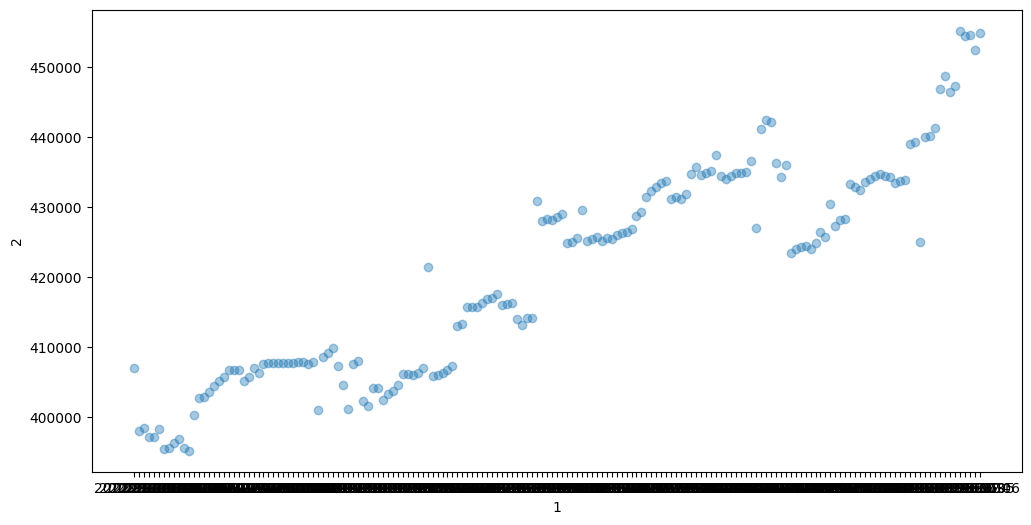

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["avg price per metr"], alpha=0.4)
plt.xlabel("1")
plt.ylabel("2")
#plt.ylim(10,120)

Text(0, 0.5, '2')

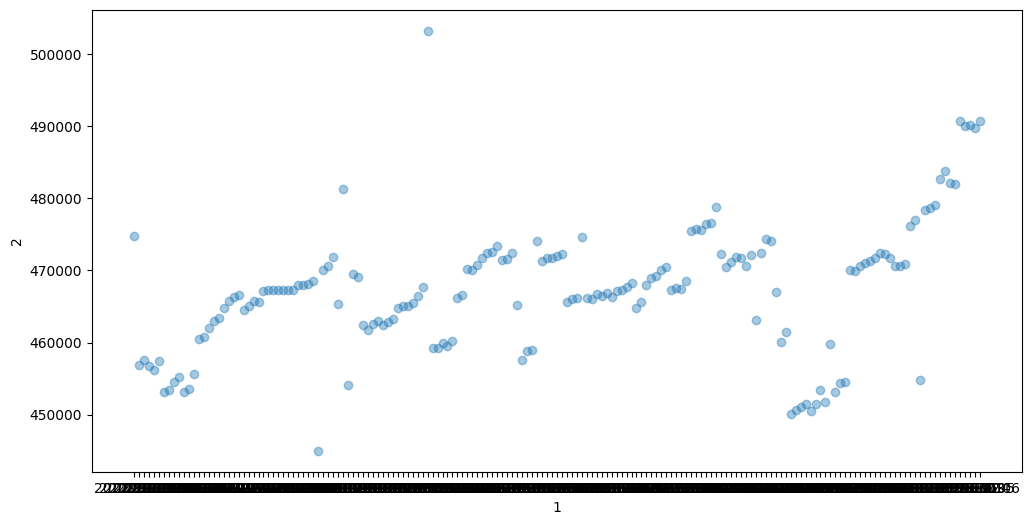

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["avg sum price per sum metr"], alpha=0.4)
plt.xlabel("1")
plt.ylabel("2")
#plt.ylim(10,120)

Text(0, 0.5, '2')

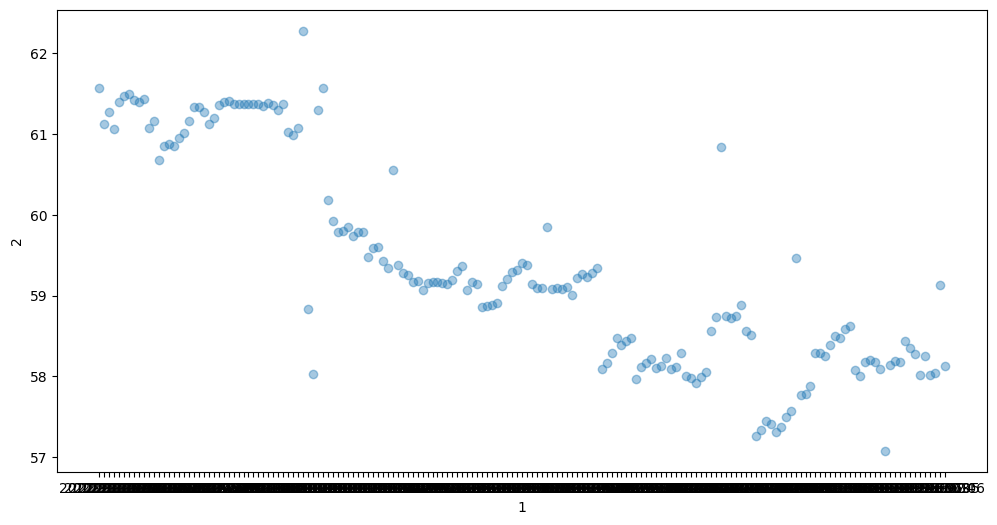

In [14]:
#avg apartment_area
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["avg apartment_area"], alpha=0.4)
plt.xlabel("1")
plt.ylabel("2")
#plt.ylim(10,120)

Text(0, 0.5, '2')

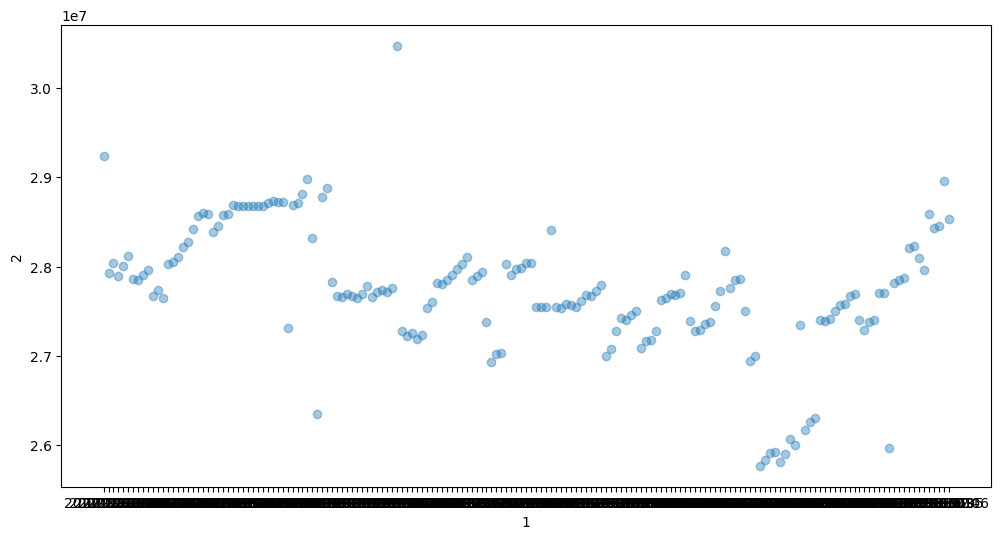

In [15]:
#avg price

#avg apartment_area
plt.figure(figsize=(12,6))
plt.scatter(df["date"],df["avg price"], alpha=0.4)
plt.xlabel("1")
plt.ylabel("2")
#plt.ylim(10,120)

Text(0, 0.5, '2')

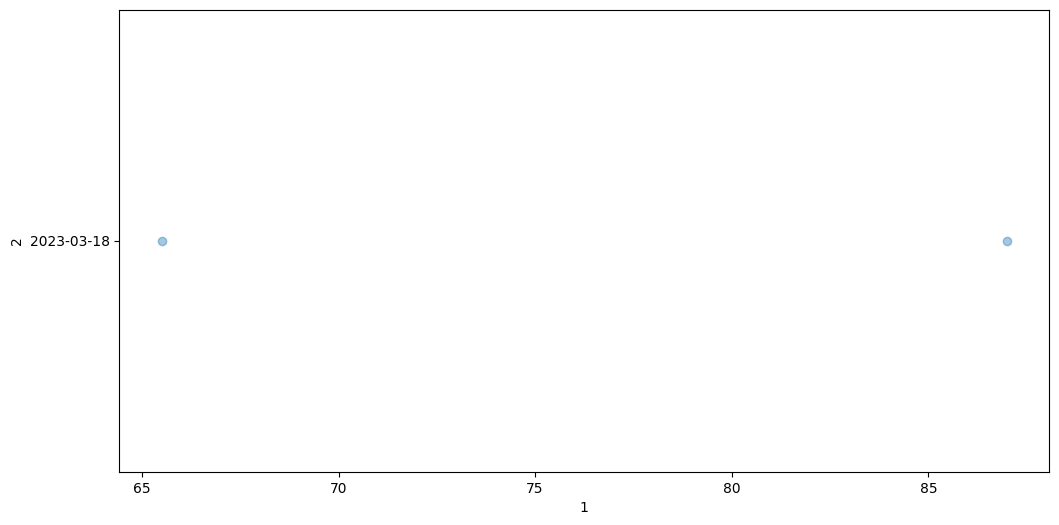

In [16]:
#вязть распределенеи стоимости по дню
#выбрать все прдлжения за день, рассчиать стоимость квадратного метра и вывести


cursor.execute("""
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where 
    ((datetime_create >= "2023-03-18"
    and 
    datetime_create < "2023-03-19")
    or
    (datetime_create >= "2022-12-07"
    and 
    datetime_create < "2022-12-08"))
    and 
    url like "https://level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
limit 2
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "id",
    "price_sale",
    "apartment_area",
    "avg",
    "date"
])

plt.figure(figsize=(12,6))
plt.scatter(df["apartment_area"], df["date"], alpha=0.4)
plt.xlabel("1")
plt.ylabel("2")
#plt.ylim(10,120)

Text(0, 0.5, '2')

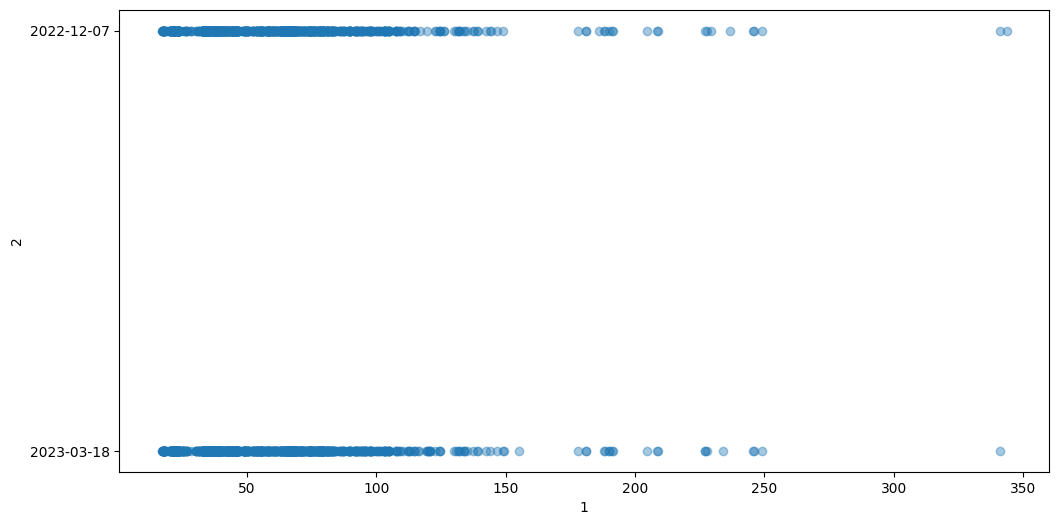

In [17]:
#вязть распределенеи стоимости по дню
#выбрать все прдлжения за день, рассчиать стоимость квадратного метра и вывести


cursor.execute("""
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    date(datetime_create) as date
    
FROM products_history
where 
    ((datetime_create >= "2023-03-18"
    and 
    datetime_create < "2023-03-19")
    or
    (datetime_create >= "2022-12-07"
    and 
    datetime_create < "2022-12-08"))
    and 
    url like "https://level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
limit 20000
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "id",
    "price_sale",
    "apartment_area",
    "avg",
    "date"
])

plt.figure(figsize=(12,6))
plt.scatter(df["apartment_area"], df["date"], alpha=0.4)
plt.xlabel("1")
plt.ylabel("2")
#plt.ylim(10,120)

Text(0, 0.5, '2')

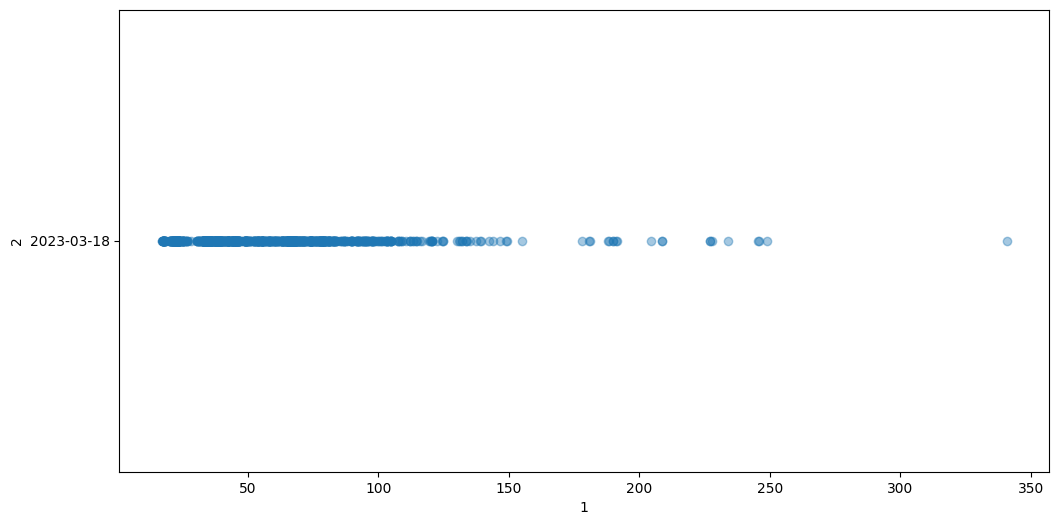

In [18]:
#вязть распределенеи стоимости по дню
#выбрать все прдлжения за день, рассчиать стоимость квадратного метра и вывести


cursor.execute("""
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    CAST(apartment_area as int) as apartment_area,
    
    CAST((price_sale / apartment_area)/20000 as decimal(15,2)),
    
    date(datetime_create) as date
    
FROM products_history
where 
    (
    (datetime_create >= "2023-03-18"    and  datetime_create < "2023-03-19")
--    or
--    (datetime_create >= "2022-12-07"    and     datetime_create < "2022-12-08")
    )
    and 
    url like "https://level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
limit 20000
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "id",
    "price_sale",
    "apartment_area",
    "avg",
    "w",
    "e",
    "date"
])

plt.figure(figsize=(12,6))
plt.scatter(df["apartment_area"], df["date"], alpha=0.4)
plt.xlabel("1")
plt.ylabel("2")
#plt.ylim(10,120)

Text(0, 0.5, '2')

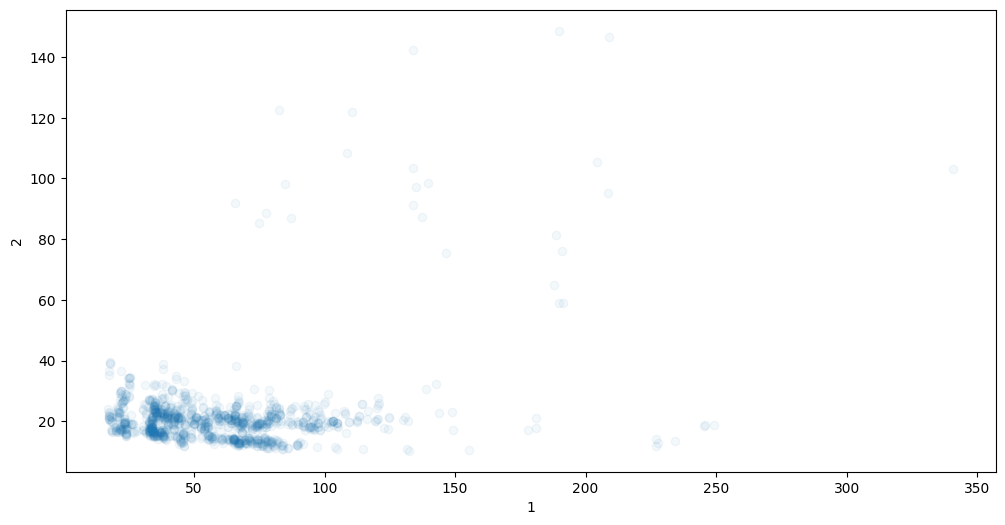

In [19]:

plt.figure(figsize=(12,6))
plt.scatter(df["apartment_area"], df["e"], alpha=0.05)
plt.xlabel("1")
plt.ylabel("2")
#plt.ylim(10,120)

Text(0, 0.5, '2')

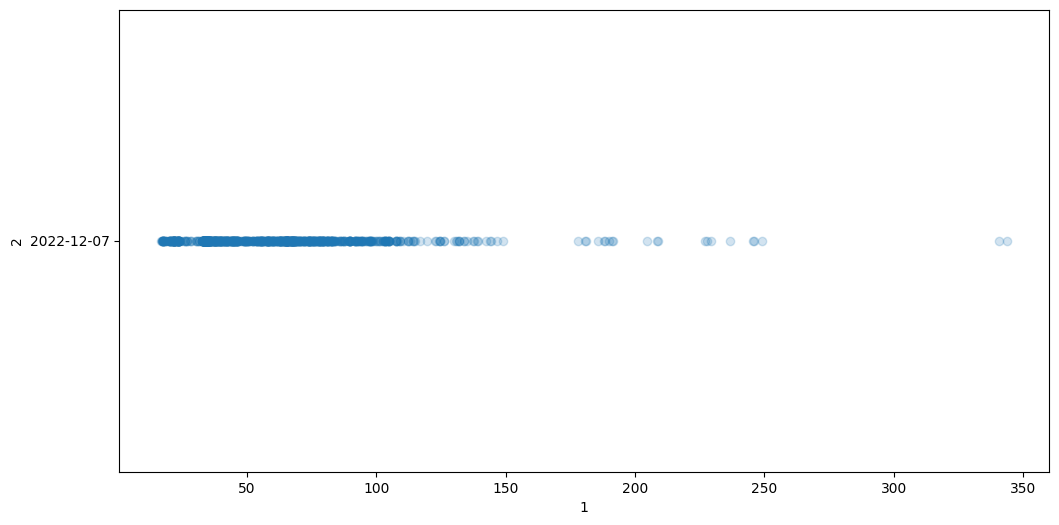

In [20]:
#вязть распределенеи стоимости по дню
#выбрать все прдлжения за день, рассчиать стоимость квадратного метра и вывести


cursor.execute("""
SELECT 
    id, 
    price_sale,
    CAST(apartment_area as decimal) as apartment_area,
    CAST(price_sale / apartment_area as decimal(15,2)),
    CAST(apartment_area as int) as apartment_area,
    
    CAST((price_sale / apartment_area)/20000 as decimal(15,2)),
    
    date(datetime_create) as date
    
FROM products_history
where 
    (
--    (datetime_create >= "2023-03-18"    and  datetime_create < "2023-03-19")
--    or
    (datetime_create >= "2022-12-07"    and     datetime_create < "2022-12-08")
    )
    and 
    url like "https://level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
limit 20000
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "id",
    "price_sale",
    "apartment_area",
    "avg",
    "w",
    "e",
    "date"
])

plt.figure(figsize=(12,6))
plt.scatter(df["apartment_area"], df["date"], alpha=0.2)
plt.xlabel("1")
plt.ylabel("2")
#plt.ylim(10,120)

Text(0, 0.5, '2')

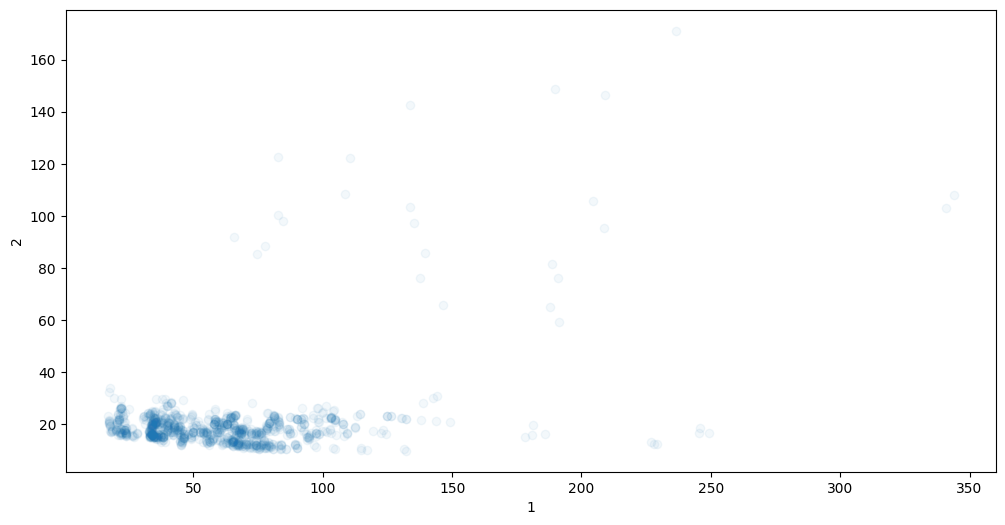

In [21]:

plt.figure(figsize=(12,6))
plt.scatter(df["apartment_area"], df["e"], alpha=0.05)
plt.xlabel("1")
plt.ylabel("2")
#plt.ylim(10,120)

In [22]:
#вязть распределенеи стоимости по дню
#выбрать все прдлжения за день, рассчиать стоимость квадратного метра и вывести


cursor.execute("""
SELECT 
 
    CAST((price_sale / apartment_area)/100000 as int),
    count(1),
    date(datetime_create) as date
    
FROM products_history
where 
    (
--    (datetime_create >= "2023-03-18"    and  datetime_create < "2023-03-19")
--    or
    (datetime_create >= "2022-12-07"    and     datetime_create < "2022-12-08")
    )
    and 
    url like "https://level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
group by CAST((price_sale / apartment_area)/100000 as int)
ORDER BY id desc
limit 20000
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "apartment_area",
    "count",
    "date"
])


df

apartment_area  count        date
0               18      1  2022-12-07
1               24      2  2022-12-07
2               17      3  2022-12-07
3               34      1  2022-12-07
4               29      2  2022-12-07
5               16      1  2022-12-07
6               15      2  2022-12-07
7               13      2  2022-12-07
8               11      1  2022-12-07
9                1      1  2022-12-07
10              28      1  2022-12-07
11              19      3  2022-12-07
12              21      3  2022-12-07
13               6      5  2022-12-07
14              20      3  2022-12-07
15               4    296  2022-12-07
16               2    235  2022-12-07
17               3    491  2022-12-07
18               5     37  2022-12-07

Text(0, 0.5, '2')

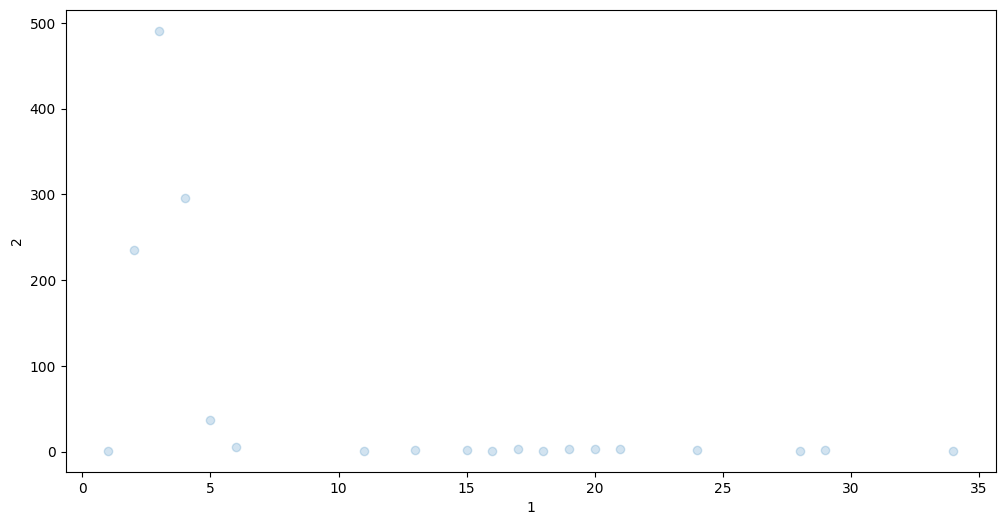

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(df["apartment_area"], df["count"], alpha=0.2)
plt.xlabel("1")
plt.ylabel("2")
#plt.ylim(10,120)

Text(0, 0.5, '2')

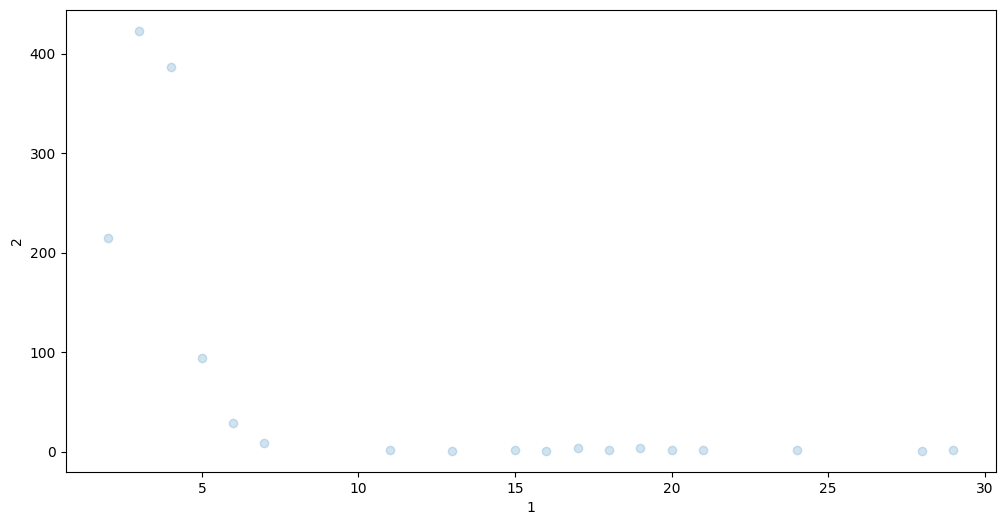

In [24]:
#вязть распределенеи стоимости по дню
#выбрать все прдлжения за день, рассчиать стоимость квадратного метра и вывести


cursor.execute("""
SELECT 
 
    CAST((price_sale / apartment_area)/100000 as int),
    count(1),
    date(datetime_create) as date
    
FROM products_history
where 
    (
    (datetime_create >= "2023-03-18"    and  datetime_create < "2023-03-19")
--    or
--    (datetime_create >= "2022-12-07"    and     datetime_create < "2022-12-08")
    )
    and 
    url like "https://level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
group by CAST((price_sale / apartment_area)/100000 as int)
ORDER BY id desc
limit 20000
""")

df = pd.DataFrame(cursor.fetchall(), columns=[
    "apartment_area",
    "count",
    "date"
])

plt.figure(figsize=(12,6))
plt.scatter(df["apartment_area"], df["count"], alpha=0.2)
plt.xlabel("1")
plt.ylabel("2")
#plt.ylim(10,120)

In [25]:


cursor.execute("""
SELECT 
 title,
 price_sale,
 
 apartment_area,
 price_sale / apartment_area,
    CAST((price_sale / apartment_area)/100000 as int),

    date(datetime_create) as date
    
FROM products_history
where 
    (
    (datetime_create >= "2023-03-18"    and  datetime_create < "2023-03-19")
--    or
--    (datetime_create >= "2022-12-07"    and     datetime_create < "2022-12-08")
    )
    and 
    url like "https://level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
    and CAST((price_sale / apartment_area)/100000 as int)<= 2

ORDER BY id desc
limit 2000000
""")

cursor.fetchall()

[('Стрешнево Юг 8 65.2 Волоколамское ш., д. 81, корп. 2 55.82495356307498,37.411886931513436',
  18727857,
  65.2,
  287237.0705521472,
  2,
  '2023-03-18'),
 ('Стрешнево Запад 15 65.0 Волоколамское ш., д. 81, корп. 2 55.82495356307498,37.411886931513436',
  18668416,
  65,
  287206,
  2,
  '2023-03-18'),
 ('Стрешнево Юг 4 65.2 Волоколамское ш., д. 81, корп. 2 55.82495356307498,37.411886931513436',
  18586835,
  65.2,
  285074.15644171776,
  2,
  '2023-03-18'),
 ('Стрешнево Запад 12 65.5 Волоколамское ш., д. 81, корп. 2 55.82495356307498,37.411886931513436',
  18564706,
  65.5,
  283430.6259541985,
  2,
  '2023-03-18'),
 ('Стрешнево Запад 13 65.0 Волоколамское ш., д. 81, корп. 2 55.82495356307498,37.411886931513436',
  18556304,
  65,
  285481,
  2,
  '2023-03-18'),
 ('Южнопортовая 7 23 61.9 Г. Москва, ул. Южнопортовая, вл.28-28а 55.705727,37.696445',
  18546160,
  61.9,
  299614.86268174474,
  2,
  '2023-03-18'),
 ('Стрешнево Юг 3 65.2 Волоколамское ш., д. 81, корп. 2 55.8249535630749

In [26]:


cursor.execute("""
SELECT 
 title,
    CAST((price_sale / apartment_area)/100000 as int),

    date(datetime_create) as date
    
FROM products_history
where 
    (
    (datetime_create >= "2023-03-18"    and  datetime_create < "2023-03-19")
--    or
--    (datetime_create >= "2022-12-07"    and     datetime_create < "2022-12-08")
    )
    and 
    url like "https://level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
    and CAST((price_sale / apartment_area)/100000 as int)<= 1

ORDER BY id desc
limit 2000000
""")

cursor.fetchall()

[]

In [27]:


cursor.execute("""
SELECT 
 title,
    CAST((price_sale / apartment_area)/100000 as int),

    date(datetime_create) as date
    
FROM products_history
where 
    (
--    (datetime_create >= "2023-03-18"    and  datetime_create < "2023-03-19")
--    or
    (datetime_create >= "2022-12-07"    and     datetime_create < "2022-12-08")
    )
    and 
    url like "https://level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
    and CAST((price_sale / apartment_area)/100000 as int)<= 2

ORDER BY id desc
limit 2000000
""")

cursor.fetchall()

[('Стрешнево Запад 24 65.2 Волоколамское ш., д. 81, корп. 2 55.82495356307498,37.411886931513436',
  2,
  '2022-12-07'),
 ('Южнопортовая 7 25 64.4 ул. Южнопортовая, вл.28-28а 55.705727,37.696445',
  2,
  '2022-12-07'),
 ('Южнопортовая 4 21 64.4 ул. Южнопортовая, вл.28-28а 55.705727,37.696445',
  2,
  '2022-12-07'),
 ('Стрешнево Юг 8 65.2 Волоколамское ш., д. 81, корп. 2 55.82495356307498,37.411886931513436',
  2,
  '2022-12-07'),
 ('Южнопортовая 4 23 63.2 ул. Южнопортовая, вл.28-28а 55.705727,37.696445',
  2,
  '2022-12-07'),
 ('Стрешнево Запад 15 65.0 Волоколамское ш., д. 81, корп. 2 55.82495356307498,37.411886931513436',
  2,
  '2022-12-07'),
 ('Стрешнево Юг 4 65.2 Волоколамское ш., д. 81, корп. 2 55.82495356307498,37.411886931513436',
  2,
  '2022-12-07'),
 ('Стрешнево Запад 12 65.5 Волоколамское ш., д. 81, корп. 2 55.82495356307498,37.411886931513436',
  2,
  '2022-12-07'),
 ('Стрешнево Запад 13 65.0 Волоколамское ш., д. 81, корп. 2 55.82495356307498,37.411886931513436',
  2,
  '20

In [28]:


cursor.execute("""
SELECT 
 title,
 price_sale,
 
 apartment_area,
 price_sale / apartment_area,
    CAST((price_sale / apartment_area)/100000 as int),

    date(datetime_create) as date
    
FROM products_history
where 
    (
    (datetime_create >= "2023-03-18"    and  datetime_create < "2023-03-19")
--    or
--    (datetime_create >= "2022-12-07"    and     datetime_create < "2022-12-08")
    )
    and 
    url like "https://level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
    and CAST((price_sale / apartment_area)/100000 as int)>= 20

ORDER BY id desc
limit 2000000
""")

cursor.fetchall()

[('Саввинская 27 27 6 189.9 Саввинская 27 55.730669,37.557942',
  564747927,
  189.9,
  2973922.7330173776,
  29,
  '2023-03-18'),
 ('Саввинская 17 17 4 110.5  55.734600731695195,37.565715889000494',
  269713058,
  110.5,
  2440842.153846154,
  24,
  '2023-03-18'),
 ('Саввинская 17 17 4 82.5  55.734600731695195,37.565715889000494',
  202359478,
  82.5,
  2452842.1575757577,
  24,
  '2023-03-18'),
 ('Саввинская 27 27 6 208.9 Саввинская 27 55.730669,37.557942',
  612356697,
  208.9,
  2931338.9037817135,
  29,
  '2023-03-18'),
 ('Саввинская 17 17 3 108.5  55.734600731695195,37.565715889000494',
  235319374,
  108.5,
  2168842.1566820275,
  21,
  '2023-03-18'),
 ('Саввинская 27 27 3 204.5 Саввинская 27 55.730669,37.557942',
  431781562,
  204.5,
  2111401.2811735943,
  21,
  '2023-03-18'),
 ('Саввинская 17 17 4 133.8  55.734600731695195,37.565715889000494',
  381020156,
  133.8,
  2847684.2750373688,
  28,
  '2023-03-18'),
 ('Саввинская 17 17 3 133.9  55.734600731695195,37.565715889000494

In [29]:


cursor.execute("""
SELECT 
 title,
 price_sale,
 
 apartment_area,
 price_sale / apartment_area,
    CAST((price_sale / apartment_area)/100000 as int),

    date(datetime_create) as date
    
FROM products_history
where 
    (
--    (datetime_create >= "2023-03-18"    and  datetime_create < "2023-03-19")
--    or
    (datetime_create >= "2022-12-07"    and     datetime_create < "2022-12-08")
    )
    and 
    url like "https://level.ru%"
    --and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
    and CAST((price_sale / apartment_area)/100000 as int)<= 1

ORDER BY id desc
limit 2000000
""")

cursor.fetchall()

[('Стрешнево Восток 23 132.2 Волоколамское ш., д. 81, корп. 2 55.82495356307498,37.411886931513436',
  25859121,
  132.2,
  195606.05900151288,
  1,
  '2022-12-07')]

# Нужно квартиры сегментировать чтобы средниие смотреть в разрезе квартир и точно исключить Гражи, кладовки, и т д